# Home Credit Default Risk (HCDR) Project Phase 3

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


## Some of the challenges

1. Dataset size 
   * (688 meg compressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data

# Dataset



## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview

The `HomeCredit_columns_description.csv` acts as a data dictioanry.

There are 7 different sources of data:

* __application_train/application_test (307k rows, and 48k rows):__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau (1.7 Million rows):__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance (27 Million rows):__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application (1.6 Million rows):__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE (10 Million rows):__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment (13.6 Million rows):__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.


### Table sizes
```python
name                       [  rows cols]     MegaBytes         
-----------------------  ------------------  -------
application_train       : [  307,511, 122]:   158MB
application_test        : [   48,744, 121]:   25MB
bureau                  : [ 1,716,428, 17]    162MB
bureau_balance          : [ 27,299,925, 3]:   358MB
credit_card_balance     : [  3,840,312, 23]   405MB
installments_payments   : [ 13,605,401, 8]    690MB
previous_application    : [  1,670,214, 37]   386MB
POS_CASH_balance        : [ 10,001,358, 8]    375MB
```




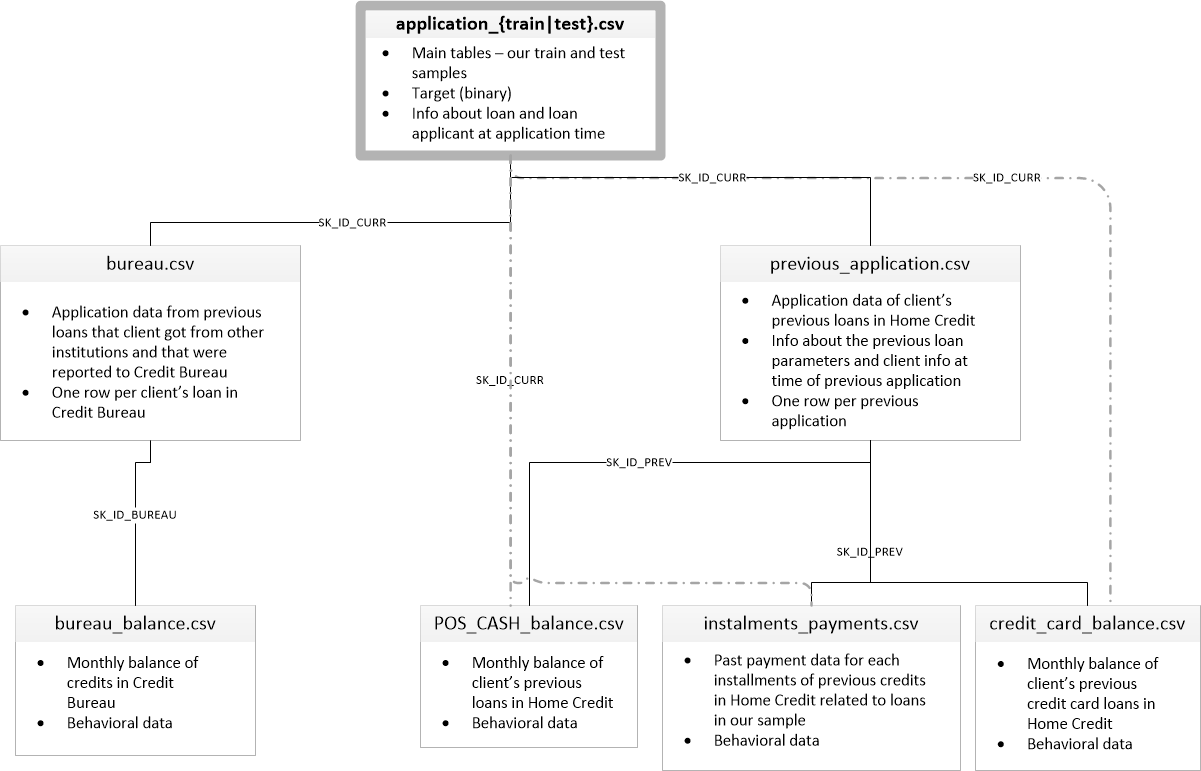

In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

## Data imports

In [2]:

import os
import pandas as pd

files = ["HCDR/" + f for f in os.listdir("HCDR")]
datasets = {}

for f in files:
    name = f.split("/")[1].split(".")[0]
    print(f"Loading {name}")
    datasets[name] = pd.read_csv(f, encoding='latin-1')

print()
print(datasets.keys())

Loading application_test
Loading 
Loading POS_CASH_balance
Loading credit_card_balance
Loading installments_payments
Loading application_train
Loading bureau
Loading previous_application
Loading bureau_balance
Loading sample_submission

dict_keys(['application_test', '', 'POS_CASH_balance', 'credit_card_balance', 'installments_payments', 'application_train', 'bureau', 'previous_application', 'bureau_balance', 'sample_submission'])


## Data files overview
### Data Dictionary

As part of the data download comes a  Data Dictionary. It named `HomeCredit_columns_description.csv`

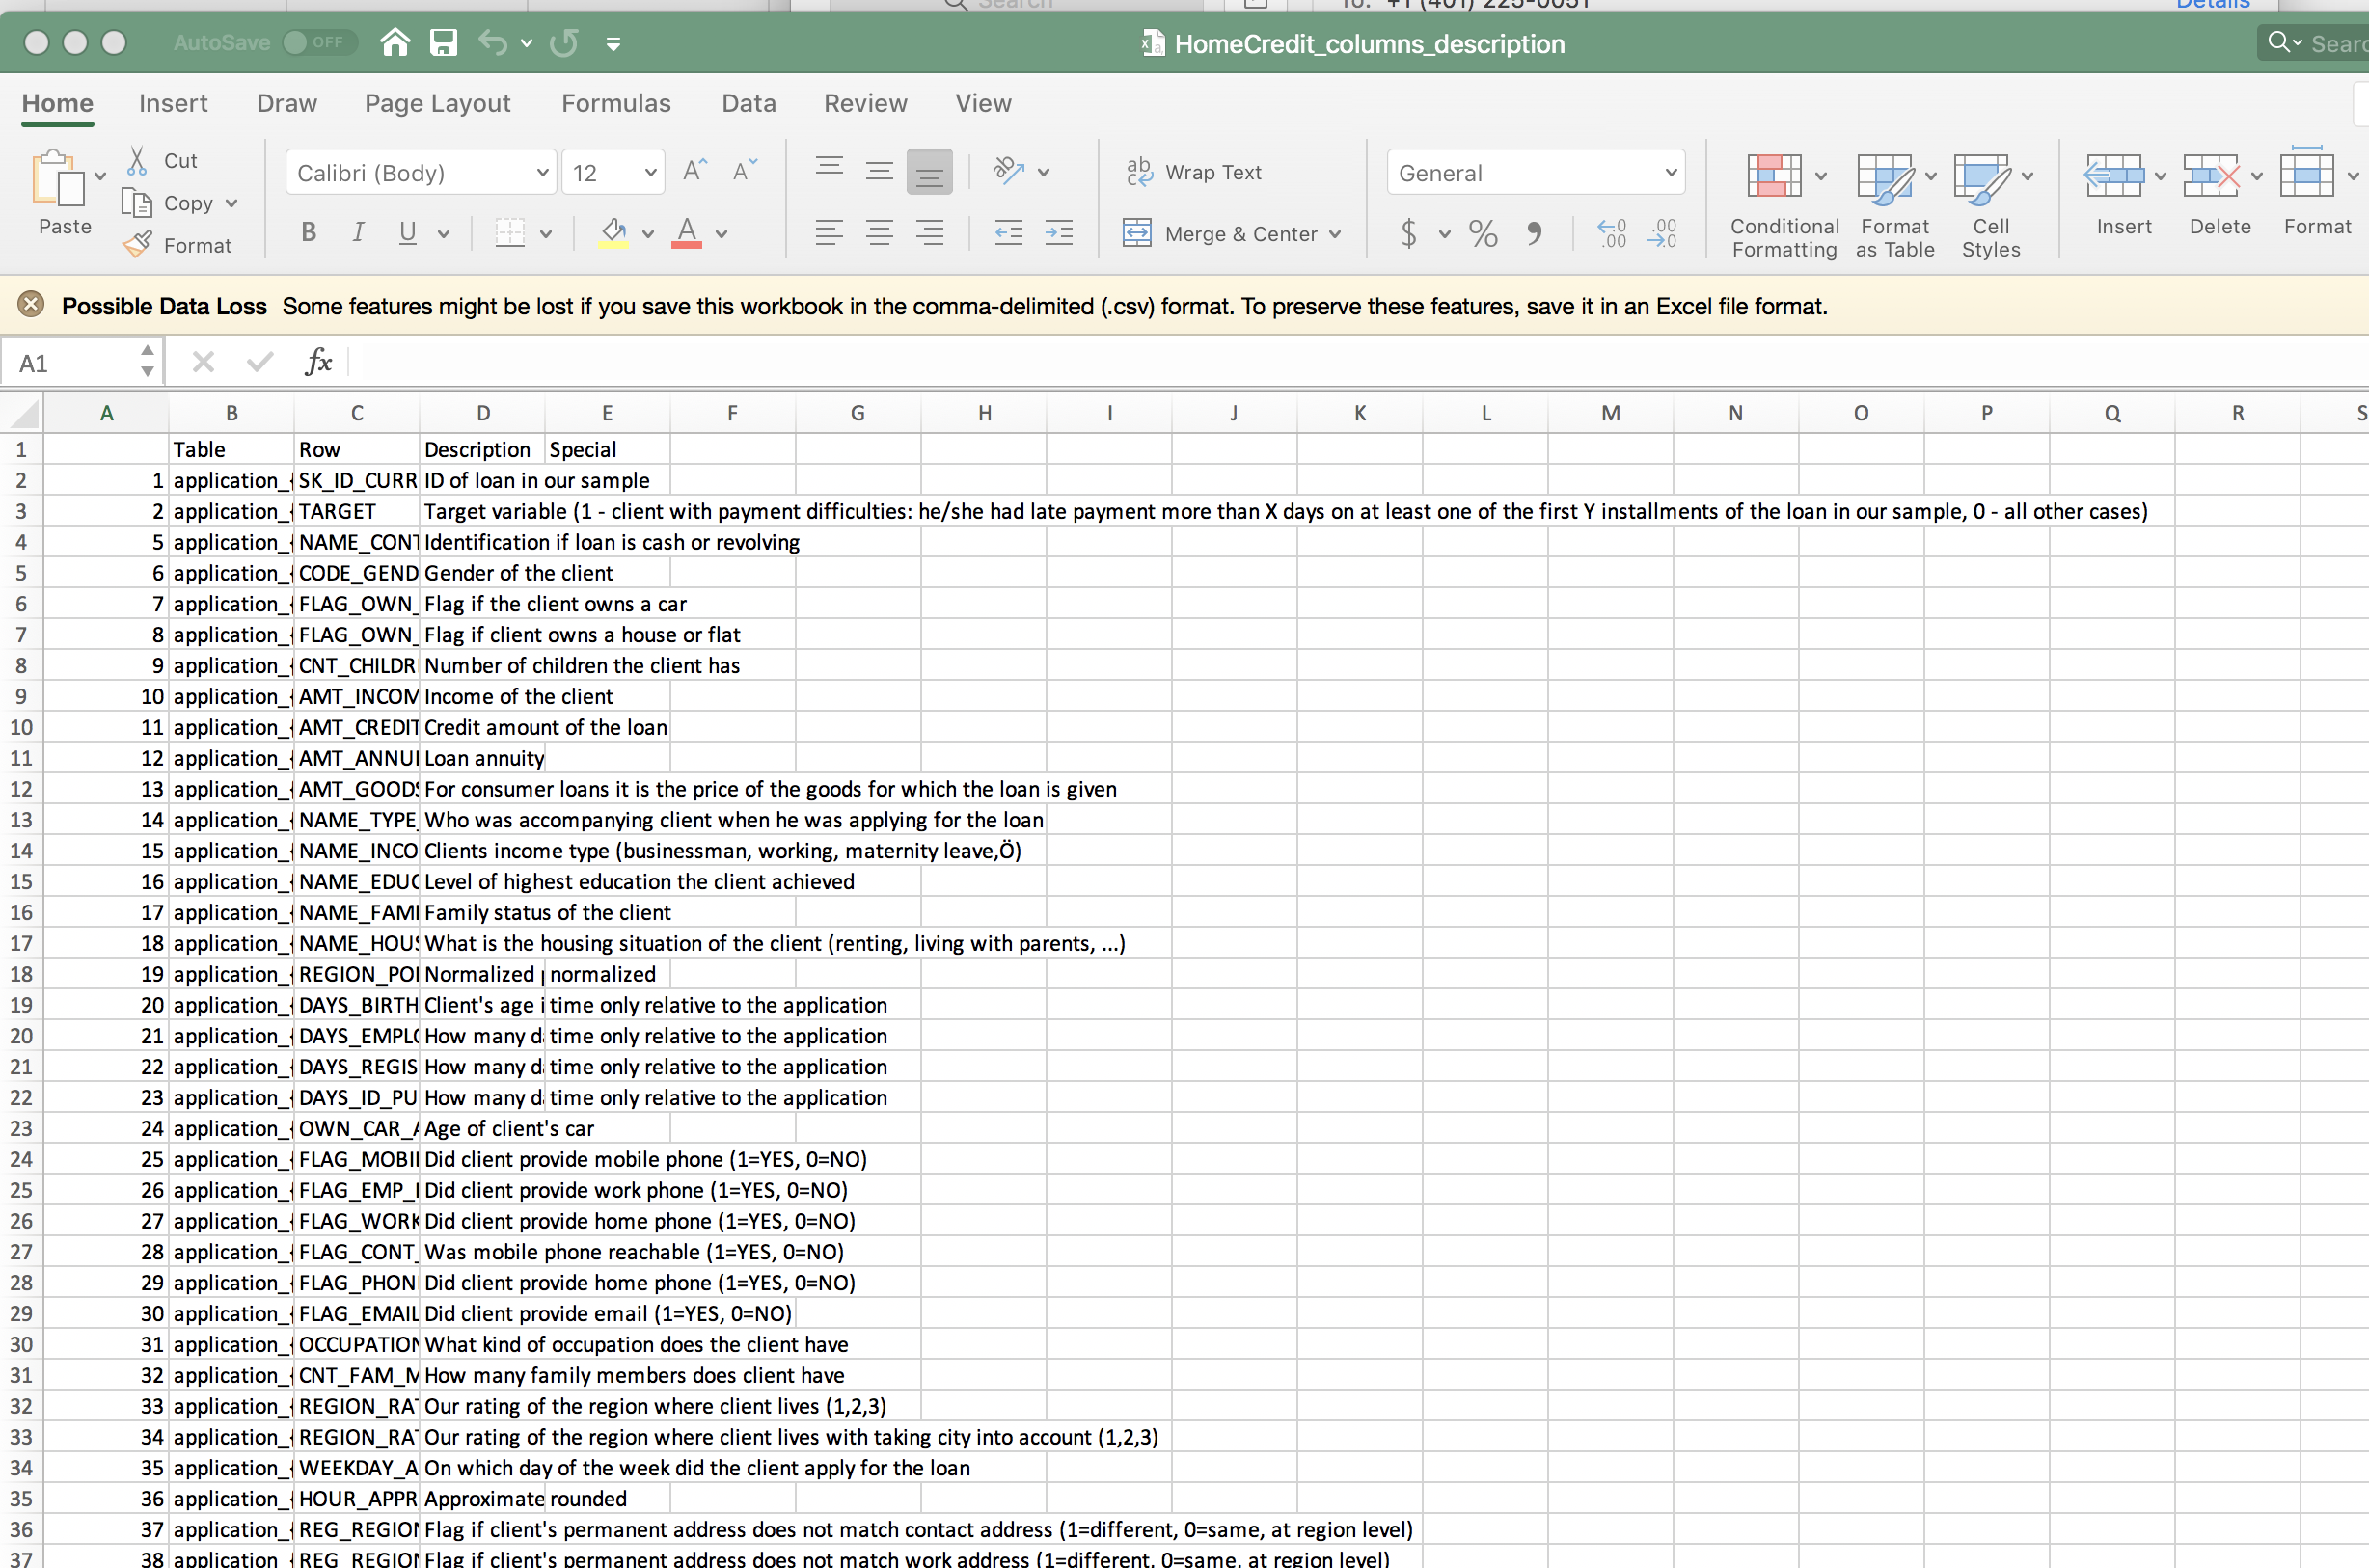

## Data Dictionary provided by data download

|Table|Row|Description|Special|
|:--|:--|:--|:--|
|application_{train|test}.csv|SK_ID_CURR|ID of loan in our sample|
|application_{train|test}.csv|TARGET|Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)|
|application_{train|test}.csv|NAME_CONTRACT_TYPE|Identification if loan is cash or revolving|
|application_{train|test}.csv|CODE_GENDER|Gender of the client|
|application_{train|test}.csv|FLAG_OWN_CAR|Flag if the client owns a car|
|application_{train|test}.csv|FLAG_OWN_REALTY|Flag if client owns a house or flat|
|application_{train|test}.csv|CNT_CHILDREN|Number of children the client has|
|application_{train|test}.csv|AMT_INCOME_TOTAL|Income of the client|
|application_{train|test}.csv|AMT_CREDIT|Credit amount of the loan|
|application_{train|test}.csv|AMT_ANNUITY|Loan annuity|
|application_{train|test}.csv|AMT_GOODS_PRICE|For consumer loans it is the price of the goods for which the loan is given|
|application_{train|test}.csv|NAME_TYPE_SUITE|Who was accompanying client when he was applying for the loan|
|application_{train|test}.csv|NAME_INCOME_TYPE|Clients income type (businessman, working, maternity leave,…)|
|application_{train|test}.csv|NAME_EDUCATION_TYPE|Level of highest education the client achieved|
|application_{train|test}.csv|NAME_FAMILY_STATUS|Family status of the client|
|application_{train|test}.csv|NAME_HOUSING_TYPE|What is the housing situation of the client (renting, living with parents, ...)|
|application_{train|test}.csv|REGION_POPULATION_RELATIVE|Normalized population of region where client lives (higher number means the client lives in more populated region)|normalized 
|application_{train|test}.csv|DAYS_BIRTH|Client's age in days at the time of application|time only relative to the application
|application_{train|test}.csv|DAYS_EMPLOYED|How many days before the application the person started current employment|time only relative to the application
|application_{train|test}.csv|DAYS_REGISTRATION|How many days before the application did client change his registration|time only relative to the application
|application_{train|test}.csv|DAYS_ID_PUBLISH|How many days before the application did client change the identity document with which he applied for the loan|time only relative to the application
|application_{train|test}.csv|OWN_CAR_AGE|Age of client's car|
|application_{train|test}.csv|FLAG_MOBIL|Did client provide mobile phone (1=YES, 0=NO)|
|application_{train|test}.csv|FLAG_EMP_PHONE|Did client provide work phone (1=YES, 0=NO)|
|application_{train|test}.csv|FLAG_WORK_PHONE|Did client provide home phone (1=YES, 0=NO)|
|application_{train|test}.csv|FLAG_CONT_MOBILE|Was mobile phone reachable (1=YES, 0=NO)|
|application_{train|test}.csv|FLAG_PHONE|Did client provide home phone (1=YES, 0=NO)|
|application_{train|test}.csv|FLAG_EMAIL|Did client provide email (1=YES, 0=NO)|
|application_{train|test}.csv|OCCUPATION_TYPE|What kind of occupation does the client have|
|application_{train|test}.csv|CNT_FAM_MEMBERS|How many family members does client have|
|application_{train|test}.csv|REGION_RATING_CLIENT|Our rating of the region where client lives (1,2,3)|
|application_{train|test}.csv|REGION_RATING_CLIENT_W_CITY|Our rating of the region where client lives with taking city into account (1,2,3)|
|application_{train|test}.csv|WEEKDAY_APPR_PROCESS_START|On which day of the week did the client apply for the loan|
|application_{train|test}.csv|HOUR_APPR_PROCESS_START|Approximately at what hour did the client apply for the loan|rounded
|application_{train|test}.csv|REG_REGION_NOT_LIVE_REGION|Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)|
|application_{train|test}.csv|REG_REGION_NOT_WORK_REGION|Flag if client's permanent address does not match work address (1=different, 0=same, at region level)|
|application_{train|test}.csv|LIVE_REGION_NOT_WORK_REGION|Flag if client's contact address does not match work address (1=different, 0=same, at region level)|
|application_{train|test}.csv|REG_CITY_NOT_LIVE_CITY|Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)|
|application_{train|test}.csv|REG_CITY_NOT_WORK_CITY|Flag if client's permanent address does not match work address (1=different, 0=same, at city level)|
|application_{train|test}.csv|LIVE_CITY_NOT_WORK_CITY|Flag if client's contact address does not match work address (1=different, 0=same, at city level)|
|application_{train|test}.csv|ORGANIZATION_TYPE|Type of organization where client works|
|application_{train|test}.csv|EXT_SOURCE_1|Normalized score from external data source|normalized
|application_{train|test}.csv|EXT_SOURCE_2|Normalized score from external data source|normalized
|application_{train|test}.csv|EXT_SOURCE_3|Normalized score from external data source|normalized
|application_{train|test}.csv|APARTMENTS_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|BASEMENTAREA_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|YEARS_BEGINEXPLUATATION_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|YEARS_BUILD_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|COMMONAREA_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|ELEVATORS_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|ENTRANCES_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|FLOORSMAX_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|FLOORSMIN_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|LANDAREA_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|LIVINGAPARTMENTS_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|LIVINGAREA_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|NONLIVINGAPARTMENTS_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|NONLIVINGAREA_AVG|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|APARTMENTS_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|BASEMENTAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|YEARS_BEGINEXPLUATATION_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|YEARS_BUILD_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|COMMONAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|ELEVATORS_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|ENTRANCES_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|FLOORSMAX_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|FLOORSMIN_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|LANDAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|LIVINGAPARTMENTS_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|LIVINGAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|NONLIVINGAPARTMENTS_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|NONLIVINGAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|APARTMENTS_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|BASEMENTAREA_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|YEARS_BEGINEXPLUATATION_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|YEARS_BUILD_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|COMMONAREA_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|ELEVATORS_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|ENTRANCES_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|FLOORSMAX_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|FLOORSMIN_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|LANDAREA_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|LIVINGAPARTMENTS_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|LIVINGAREA_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|NONLIVINGAPARTMENTS_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|NONLIVINGAREA_MEDI|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|FONDKAPREMONT_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|HOUSETYPE_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|TOTALAREA_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|WALLSMATERIAL_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|EMERGENCYSTATE_MODE|Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor|normalized
|application_{train|test}.csv|OBS_30_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings with observable 30 DPD (days past due) default|
|application_{train|test}.csv|DEF_30_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings defaulted on 30 DPD (days past due) |
|application_{train|test}.csv|OBS_60_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings with observable 60 DPD (days past due) default|
|application_{train|test}.csv|DEF_60_CNT_SOCIAL_CIRCLE|How many observation of client's social surroundings defaulted on 60 (days past due) DPD|
|application_{train|test}.csv|DAYS_LAST_PHONE_CHANGE|How many days before application did client change phone|
|application_{train|test}.csv|FLAG_DOCUMENT_2|Did client provide document 2|
|application_{train|test}.csv|FLAG_DOCUMENT_3|Did client provide document 3|
|application_{train|test}.csv|FLAG_DOCUMENT_4|Did client provide document 4|
|application_{train|test}.csv|FLAG_DOCUMENT_5|Did client provide document 5|
|application_{train|test}.csv|FLAG_DOCUMENT_6|Did client provide document 6|
|application_{train|test}.csv|FLAG_DOCUMENT_7|Did client provide document 7|
|application_{train|test}.csv|FLAG_DOCUMENT_8|Did client provide document 8|
|application_{train|test}.csv|FLAG_DOCUMENT_9|Did client provide document 9|
|application_{train|test}.csv|FLAG_DOCUMENT_10|Did client provide document 10|
|application_{train|test}.csv|FLAG_DOCUMENT_11|Did client provide document 11|
|application_{train|test}.csv|FLAG_DOCUMENT_12|Did client provide document 12|
|application_{train|test}.csv|FLAG_DOCUMENT_13|Did client provide document 13|
|application_{train|test}.csv|FLAG_DOCUMENT_14|Did client provide document 14|
|application_{train|test}.csv|FLAG_DOCUMENT_15|Did client provide document 15|
|application_{train|test}.csv|FLAG_DOCUMENT_16|Did client provide document 16|
|application_{train|test}.csv|FLAG_DOCUMENT_17|Did client provide document 17|
|application_{train|test}.csv|FLAG_DOCUMENT_18|Did client provide document 18|
|application_{train|test}.csv|FLAG_DOCUMENT_19|Did client provide document 19|
|application_{train|test}.csv|FLAG_DOCUMENT_20|Did client provide document 20|
|application_{train|test}.csv|FLAG_DOCUMENT_21|Did client provide document 21|
|application_{train|test}.csv|AMT_REQ_CREDIT_BUREAU_HOUR|Number of enquiries to Credit Bureau about the client one hour before application|
|application_{train|test}.csv|AMT_REQ_CREDIT_BUREAU_DAY|Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)|
|application_{train|test}.csv|AMT_REQ_CREDIT_BUREAU_WEEK|Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)|
|application_{train|test}.csv|AMT_REQ_CREDIT_BUREAU_MON|Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)|
|application_{train|test}.csv|AMT_REQ_CREDIT_BUREAU_QRT|Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)|
|application_{train|test}.csv|AMT_REQ_CREDIT_BUREAU_YEAR|Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)|
|bureau.csv|SK_ID_CURR|ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau |hashed
|bureau.csv|SK_BUREAU_ID|Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application)|hashed
|bureau.csv|CREDIT_ACTIVE|Status of the Credit Bureau (CB) reported credits|
|bureau.csv|CREDIT_CURRENCY|Recoded currency of the Credit Bureau credit|recoded
|bureau.csv|DAYS_CREDIT|How many days before current application did client apply for Credit Bureau credit|time only relative to the application
|bureau.csv|CREDIT_DAY_OVERDUE|Number of days past due on CB credit at the time of application for related loan in our sample|
|bureau.csv|DAYS_CREDIT_ENDDATE|Remaining duration of CB credit (in days) at the time of application in Home Credit|time only relative to the application
|bureau.csv|DAYS_ENDDATE_FACT|Days since CB credit ended at the time of application in Home Credit (only for closed credit)|time only relative to the application
|bureau.csv|AMT_CREDIT_MAX_OVERDUE|Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)|
|bureau.csv|CNT_CREDIT_PROLONG|How many times was the Credit Bureau credit prolonged|
|bureau.csv|AMT_CREDIT_SUM|Current credit amount for the Credit Bureau credit|
|bureau.csv|AMT_CREDIT_SUM_DEBT|Current debt on Credit Bureau credit|
|bureau.csv|AMT_CREDIT_SUM_LIMIT|Current credit limit of credit card reported in Credit Bureau|
|bureau.csv|AMT_CREDIT_SUM_OVERDUE|Current amount overdue on Credit Bureau credit|
|bureau.csv|CREDIT_TYPE|Type of Credit Bureau credit (Car, cash,...)|
|bureau.csv|DAYS_CREDIT_UPDATE|How many days before loan application did last information about the Credit Bureau credit come|time only relative to the application
|bureau.csv|AMT_ANNUITY|Annuity of the Credit Bureau credit|
|bureau_balance.csv|SK_BUREAU_ID|Recoded ID of Credit Bureau credit (unique coding for each application) - use this to join to CREDIT_BUREAU table |hashed
|bureau_balance.csv|MONTHS_BALANCE|Month of balance relative to application date (-1 means the freshest balance date)|time only relative to the application
|bureau_balance.csv|STATUS|Status of Credit Bureau loan during the month (active, closed, DPD0-30,… [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,… 5 means DPD 120+ or sold or written off ] )|
|POS_CASH_balance.csv|SK_ID_PREV |ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)|
|POS_CASH_balance.csv|SK_ID_CURR|ID of loan in our sample|
|POS_CASH_balance.csv|MONTHS_BALANCE|Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )|time only relative to the application
|POS_CASH_balance.csv|CNT_INSTALMENT|Term of previous credit (can change over time)|
|POS_CASH_balance.csv|CNT_INSTALMENT_FUTURE|Installments left to pay on the previous credit|
|POS_CASH_balance.csv|NAME_CONTRACT_STATUS|Contract status during the month|
|POS_CASH_balance.csv|SK_DPD|DPD (days past due) during the month of previous credit|
|POS_CASH_balance.csv|SK_DPD_DEF|DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit|
|credit_card_balance.csv|SK_ID_PREV |ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)|hashed
|credit_card_balance.csv|SK_ID_CURR|ID of loan in our sample|hashed
|credit_card_balance.csv|MONTHS_BALANCE|Month of balance relative to application date (-1 means the freshest balance date)|time only relative to the application
|credit_card_balance.csv|AMT_BALANCE|Balance during the month of previous credit|
|credit_card_balance.csv|AMT_CREDIT_LIMIT_ACTUAL|Credit card limit during the month of the previous credit|
|credit_card_balance.csv|AMT_DRAWINGS_ATM_CURRENT|Amount drawing at ATM during the month of the previous credit|
|credit_card_balance.csv|AMT_DRAWINGS_CURRENT|Amount drawing during the month of the previous credit|
|credit_card_balance.csv|AMT_DRAWINGS_OTHER_CURRENT|Amount of other drawings during the month of the previous credit|
|credit_card_balance.csv|AMT_DRAWINGS_POS_CURRENT|Amount drawing or buying goods during the month of the previous credit|
|credit_card_balance.csv|AMT_INST_MIN_REGULARITY|Minimal installment for this month of the previous credit|
|credit_card_balance.csv|AMT_PAYMENT_CURRENT|How much did the client pay during the month on the previous credit|
|credit_card_balance.csv|AMT_PAYMENT_TOTAL_CURRENT|How much did the client pay during the month in total on the previous credit|
|credit_card_balance.csv|AMT_RECEIVABLE_PRINCIPAL|Amount receivable for principal on the previous credit|
|credit_card_balance.csv|AMT_RECIVABLE|Amount receivable on the previous credit|
|credit_card_balance.csv|AMT_TOTAL_RECEIVABLE|Total amount receivable on the previous credit|
|credit_card_balance.csv|CNT_DRAWINGS_ATM_CURRENT|Number of drawings at ATM during this month on the previous credit|
|credit_card_balance.csv|CNT_DRAWINGS_CURRENT|Number of drawings during this month on the previous credit|
|credit_card_balance.csv|CNT_DRAWINGS_OTHER_CURRENT|Number of other drawings during this month on the previous credit|
|credit_card_balance.csv|CNT_DRAWINGS_POS_CURRENT|Number of drawings for goods during this month on the previous credit|
|credit_card_balance.csv|CNT_INSTALMENT_MATURE_CUM|Number of paid installments on the previous credit|
|credit_card_balance.csv|NAME_CONTRACT_STATUS|Contract status (active signed,...) on the previous credit|
|credit_card_balance.csv|SK_DPD|DPD (Days past due) during the month on the previous credit|
|credit_card_balance.csv|SK_DPD_DEF|DPD (Days past due) during the month with tolerance (debts with low loan amounts are ignored) of the previous credit|
|previous_application.csv|SK_ID_PREV |ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit) |hashed
|previous_application.csv|SK_ID_CURR|ID of loan in our sample|hashed
|previous_application.csv|NAME_CONTRACT_TYPE|Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application|
|previous_application.csv|AMT_ANNUITY|Annuity of previous application|
|previous_application.csv|AMT_APPLICATION|For how much credit did client ask on the previous application|
|previous_application.csv|AMT_CREDIT|Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT|
|previous_application.csv|AMT_DOWN_PAYMENT|Down payment on the previous application|
|previous_application.csv|AMT_GOODS_PRICE|Goods price of good that client asked for (if applicable) on the previous application|
|previous_application.csv|WEEKDAY_APPR_PROCESS_START|On which day of the week did the client apply for previous application|
|previous_application.csv|HOUR_APPR_PROCESS_START|Approximately at what day hour did the client apply for the previous application|rounded
|previous_application.csv|FLAG_LAST_APPL_PER_CONTRACT|Flag if it was last application for the previous contract. Sometimes by mistake of client or our clerk there could be more applications for one single contract|
|previous_application.csv|NFLAG_LAST_APPL_IN_DAY|Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the database twice|
|previous_application.csv|NFLAG_MICRO_CASH|Flag Micro finance loan|
|previous_application.csv|RATE_DOWN_PAYMENT|Down payment rate normalized on previous credit|normalized
|previous_application.csv|RATE_INTEREST_PRIMARY|Interest rate normalized on previous credit|normalized
|previous_application.csv|RATE_INTEREST_PRIVILEGED|Interest rate normalized on previous credit|normalized
|previous_application.csv|NAME_CASH_LOAN_PURPOSE|Purpose of the cash loan|
|previous_application.csv|NAME_CONTRACT_STATUS|Contract status (approved, cancelled, ...) of previous application|
|previous_application.csv|DAYS_DECISION|Relative to current application when was the decision about previous application made|time only relative to the application
|previous_application.csv|NAME_PAYMENT_TYPE|Payment method that client chose to pay for the previous application|
|previous_application.csv|CODE_REJECT_REASON|Why was the previous application rejected|
|previous_application.csv|NAME_TYPE_SUITE|Who accompanied client when applying for the previous application|
|previous_application.csv|NAME_CLIENT_TYPE|Was the client old or new client when applying for the previous application|
|previous_application.csv|NAME_GOODS_CATEGORY|What kind of goods did the client apply for in the previous application|
|previous_application.csv|NAME_PORTFOLIO|Was the previous application for CASH, POS, CAR, …|
|previous_application.csv|NAME_PRODUCT_TYPE|Was the previous application x-sell o walk-in|
|previous_application.csv|CHANNEL_TYPE|Through which channel we acquired the client on the previous application|
|previous_application.csv|SELLERPLACE_AREA|Selling area of seller place of the previous application|
|previous_application.csv|NAME_SELLER_INDUSTRY|The industry of the seller|
|previous_application.csv|CNT_PAYMENT|Term of previous credit at application of the previous application|
|previous_application.csv|NAME_YIELD_GROUP|Grouped interest rate into small medium and high of the previous application|grouped
|previous_application.csv|PRODUCT_COMBINATION|Detailed product combination of the previous application|
|previous_application.csv|DAYS_FIRST_DRAWING|Relative to application date of current application when was the first disbursement of the previous application|time only relative to the application
|previous_application.csv|DAYS_FIRST_DUE|Relative to application date of current application when was the first due supposed to be of the previous application|time only relative to the application
|previous_application.csv|DAYS_LAST_DUE_1ST_VERSION|Relative to application date of current application when was the first due of the previous application|time only relative to the application
|previous_application.csv|DAYS_LAST_DUE|Relative to application date of current application when was the last due date of the previous application|time only relative to the application
|previous_application.csv|DAYS_TERMINATION|Relative to application date of current application when was the expected termination of the previous application|time only relative to the application
|previous_application.csv|NFLAG_INSURED_ON_APPROVAL|Did the client requested insurance during the previous application|
|installments_payments.csv|SK_ID_PREV |ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)|hashed
|installments_payments.csv|SK_ID_CURR|ID of loan in our sample|hashed
|installments_payments.csv|NUM_INSTALMENT_VERSION|Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed|
|installments_payments.csv|NUM_INSTALMENT_NUMBER|On which installment we observe payment|
|installments_payments.csv|DAYS_INSTALMENT|When the installment of previous credit was supposed to be paid (relative to application date of current loan)|time only relative to the application
|installments_payments.csv|DAYS_ENTRY_PAYMENT|When was the installments of previous credit paid actually (relative to application date of current loan)|time only relative to the application
|installments_payments.csv|AMT_INSTALMENT|What was the prescribed installment amount of previous credit on this installment|
|installments_payments.csv|AMT_PAYMENT|What the client actually paid on previous credit on this installment|
|

# Join the unlabeled dataset (i.e., the submission file)

In [3]:
appsDF = datasets["previous_application"]
display(appsDF.head())
print(f"{appsDF.shape[0]:,} rows, {appsDF.shape[1]:,} columns")

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


1,670,214 rows, 37 columns


In [4]:
# Create aggregate features (via pipeline)
class prevAppsFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
        self.agg_op_features = {}
        for f in features:
#             self.agg_op_features[f] = {f"{f}_{func}":func for func in ["min", "max", "mean"]}
            self.agg_op_features[f] =  ["min", "max", "mean"]

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
#         result.columns = result.columns.droplevel()
        result.columns = ["_".join(x) for x in result.columns.ravel()]

        result = result.reset_index(level=["SK_ID_CURR"])
        result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
        return result # return dataframe with the join key "SK_ID_CURR"
    

from sklearn.pipeline import make_pipeline 
def test_driver_prevAppsFeaturesAggregater(df, features):
    print(f"df.shape: {df.shape}\n")
    print(f"df[{features}][0:5]: \n{df[features][0:5]}")
    test_pipeline = make_pipeline(prevAppsFeaturesAggregater(features))
    return(test_pipeline.fit_transform(df))
         
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
features = ['AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CNT_PAYMENT', 
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION']
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
res = test_driver_prevAppsFeaturesAggregater(appsDF, features)
print(f"HELLO")
print(f"Test driver: \n{res[0:10]}")
print(f"input[features][0:10]: \n{appsDF[0:10]}")

df.shape: (1670214, 37)

df[['AMT_ANNUITY', 'AMT_APPLICATION']][0:5]: 
   AMT_ANNUITY  AMT_APPLICATION
0     1730.430          17145.0
1    25188.615         607500.0
2    15060.735         112500.0
3    47041.335         450000.0
4    31924.395         337500.0
HELLO
Test driver: 
   SK_ID_CURR  AMT_ANNUITY_min  AMT_ANNUITY_max  AMT_ANNUITY_mean  \
0      100001         3951.000         3951.000       3951.000000   
1      100002         9251.775         9251.775       9251.775000   
2      100003         6737.310        98356.995      56553.990000   
3      100004         5357.250         5357.250       5357.250000   
4      100005         4813.200         4813.200       4813.200000   
5      100006         2482.920        39954.510      23651.175000   
6      100007         1834.290        22678.785      12278.805000   
7      100008         8019.090        25309.575      15839.696250   
8      100009         7435.845        17341.605      10051.412143   
9      100010        27463.

In [5]:
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
prevApps_feature_pipeline = Pipeline([
#         ('prevApps_add_features1', prevApps_add_features1()),  # add some new features 
#         ('prevApps_add_features2', prevApps_add_features2()),  # add some new features
#         ('prevApps_aggregater', prevAppsFeaturesAggregater()), # Aggregate across old and new features
            ('prevApps_aggregater', prevAppsFeaturesAggregater(features)), # Aggregate across old and new features

    ])


X_train= datasets["application_train"] #primary dataset
appsDF = datasets["previous_application"] #prev app


merge_all_data = False
# transform all the secondary tables
# 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
# 'previous_application', 'POS_CASH_balance'

In [6]:
if merge_all_data:
    prevApps_aggregated = prevApps_feature_pipeline.transform(appsDF)
    
    #'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
    # 'previous_application', 'POS_CASH_balance'

    bureau_aggregated = bureau_feature_pipeline.transform(bureau_DF)
    bureau_bal_aggregated = bureau_bal_feature_pipeline.transform(bureau_bal)
    cc_bal_aggregated = cc_bal_feature_pipeline.transform(cc_bal_DF)
    install_pmt_aggregated = install_pmt_feature_pipeline.transform(install_pmt_DF)
    POS_cash_bal_aggregated = POS_cash_bal_feature_pipeline.transform(POS_cash_DF)

In [7]:
X_kaggle_test= datasets["application_test"]
if merge_all_data:
    # 1. Join/Merge in prevApps Data
    X_kaggle_test = X_kaggle_test.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')

    # 2. Join/Merge in bureau Data
    X_kaggle_test = X_kaggle_test.merge(bureau_aggregated, how='left', on='SK_ID_CURR')

    # 3. Join/Merge in bureau_balance Data
    X_kaggle_test = X_kaggle_test.merge(bureau_bal_aggregated, how='left', on='SK_ID_CURR')


    # 4. Join/Merge in credit_card_balance Data
    X_kaggle_test = X_kaggle_test.merge(cc_bal_aggregated, how='left', on='SK_ID_CURR')


    # 5. Join/Merge in installments_payments Data
    X_kaggle_test = X_kaggle_test.merge(install_pmt_aggregated, how='left', on='SK_ID_CURR')
    
    # 6. Join/Merge in POS_cash_balance Data
    X_kaggle_test = X_kaggle_test.merge(POS_cash_bal_aggregated, how='left', on='SK_ID_CURR')

### Distribution of Target

We see a very unbalanced target variable. Clearly, most people repaid their loans. This is exactly why we intend to use the F-1 Score, which can handle this imbalance as a scoring metric.

Text(0.5, 0, 'Target Class - 0: the loan was repaid / 1: the loan was not repaid')

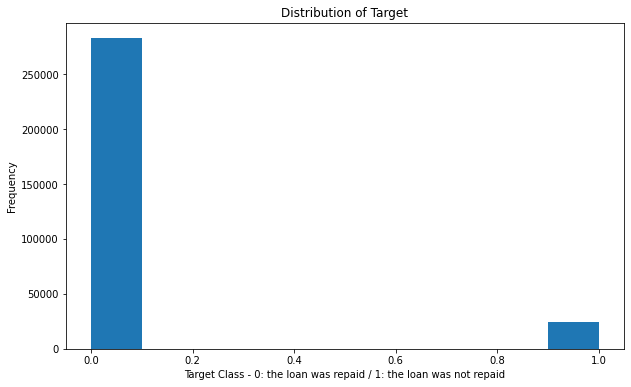

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
train = datasets['application_train']
plt.figure(figsize=(10,6))
train["TARGET"].astype(int).plot.hist()
plt.title("Distribution of Target")
plt.xlabel("Target Class - 0: the loan was repaid / 1: the loan was not repaid")

# Feature Selection for Application_training data

## Print Info and Description Summaries of Files

In [9]:
def print_info(df):
    print ("INFO:")
    print(datasets[df].info(verbose=True, null_counts=True))
    print()
    print("DATA DESCRIPTION: ")
    print(datasets[df].describe())

In [10]:
for file_name in datasets.keys(): 
    print(f"File: {file_name}".upper())
    print("--------------------------")
    print_info(file_name)
    print()
    print("*************************************************************************************")
    print()

FILE: APPLICATION_TEST
--------------------------
INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    SK_ID_CURR                    48744 non-null  int64  
 1    NAME_CONTRACT_TYPE            48744 non-null  object 
 2    CODE_GENDER                   48744 non-null  object 
 3    FLAG_OWN_CAR                  48744 non-null  object 
 4    FLAG_OWN_REALTY               48744 non-null  object 
 5    CNT_CHILDREN                  48744 non-null  int64  
 6    AMT_INCOME_TOTAL              48744 non-null  float64
 7    AMT_CREDIT                    48744 non-null  float64
 8    AMT_ANNUITY                   48720 non-null  float64
 9    AMT_GOODS_PRICE               48744 non-null  float64
 10   NAME_TYPE_SUITE               47833 non-null  object 
 11   NAME_INCOME_TYPE              48744 non-null  ob

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Non-Null Count     Dtype  
---  ------                 --------------     -----  
 0   SK_ID_PREV             10001358 non-null  int64  
 1   SK_ID_CURR             10001358 non-null  int64  
 2   MONTHS_BALANCE         10001358 non-null  int64  
 3   CNT_INSTALMENT         9975287 non-null   float64
 4   CNT_INSTALMENT_FUTURE  9975271 non-null   float64
 5   NAME_CONTRACT_STATUS   10001358 non-null  object 
 6   SK_DPD                 10001358 non-null  int64  
 7   SK_DPD_DEF             10001358 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None

DATA DESCRIPTION: 
         SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
count  1.000136e+07  1.000136e+07    1.000136e+07    9.975287e+06   
mean   1.903217e+06  2.784039e+05   -3.501259e+01    1.708965e+01   
std    5.358465e+05  1.027637e+05    2.6

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Non-Null Count     Dtype  
---  ------                  --------------     -----  
 0   SK_ID_PREV              13605401 non-null  int64  
 1   SK_ID_CURR              13605401 non-null  int64  
 2   NUM_INSTALMENT_VERSION  13605401 non-null  float64
 3   NUM_INSTALMENT_NUMBER   13605401 non-null  int64  
 4   DAYS_INSTALMENT         13605401 non-null  float64
 5   DAYS_ENTRY_PAYMENT      13602496 non-null  float64
 6   AMT_INSTALMENT          13605401 non-null  float64
 7   AMT_PAYMENT             13602496 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None

DATA DESCRIPTION: 
         SK_ID_PREV    SK_ID_CURR  NUM_INSTALMENT_VERSION  \
count  1.360540e+07  1.360540e+07            1.360540e+07   
mean   1.903365e+06  2.784449e+05            8.566373e-01   
std    5.362029e+05  1.027183e+05            1.035216e+00   
min  

          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Feature Selection for application_train: 

### Correlations for Numerical Data

In [11]:
#application_train
train = datasets['application_train']
corrs = pd.DataFrame(train.corr()['TARGET']).rename(columns={"TARGET":"cor"})
corrs["abs_corr"] = corrs.abs()
corrs = corrs.sort_values("cor")
print(corrs)

                                  cor  abs_corr
EXT_SOURCE_3                -0.178919  0.178919
EXT_SOURCE_2                -0.160472  0.160472
EXT_SOURCE_1                -0.155317  0.155317
DAYS_EMPLOYED               -0.044932  0.044932
FLOORSMAX_AVG               -0.044003  0.044003
...                               ...       ...
DAYS_LAST_PHONE_CHANGE       0.055218  0.055218
REGION_RATING_CLIENT         0.058899  0.058899
REGION_RATING_CLIENT_W_CITY  0.060893  0.060893
DAYS_BIRTH                   0.078239  0.078239
TARGET                       1.000000  1.000000

[106 rows x 2 columns]


In [12]:
# Top Correlated Features
print("10 Most positive correlations to Target:")
print("-------------------------------------------------------")
print(corrs["cor"].tail(10))
print()

print("\n10 Most negative correlations to Target:")
print("-------------------------------------------------------")
print(corrs["cor"].head(10))
print()

print("\n10 Most correlated to Target (by absolute value):")
print("-------------------------------------------------------")
top_10_corrs = corrs.sort_values("abs_corr", ascending=False).head(11)
print(top_10_corrs)

10 Most positive correlations to Target:
-------------------------------------------------------
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: cor, dtype: float64


10 Most negative correlations to Target:
-------------------------------------------------------
EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG              

Other logical numerical variables to consider: 
- 'AMT_INCOME_TOTAL'
- 'AMT_CREDIT'  

Total income, Amount of credit are all impactful factors on a person's likelihood of paying back a loan. 

In [13]:
#Update Numerical Features List to account for Correlation and Logic
selected_num_features = list(top_10_corrs.index)
other_num_features = ['AMT_INCOME_TOTAL','AMT_CREDIT']

for feature in other_num_features: 
    selected_num_features.append(feature)

In [14]:
print("Updated Numerical Features: \n")
for col in selected_num_features:
    print(col)
    
print(f"\n# of Updated Numerical Features Based on High Correlation: {len(selected_num_features)}")

Updated Numerical Features: 

TARGET
EXT_SOURCE_3
EXT_SOURCE_2
EXT_SOURCE_1
DAYS_BIRTH
REGION_RATING_CLIENT_W_CITY
REGION_RATING_CLIENT
DAYS_LAST_PHONE_CHANGE
DAYS_ID_PUBLISH
REG_CITY_NOT_WORK_CITY
FLAG_EMP_PHONE
AMT_INCOME_TOTAL
AMT_CREDIT

# of Updated Numerical Features Based on High Correlation: 13


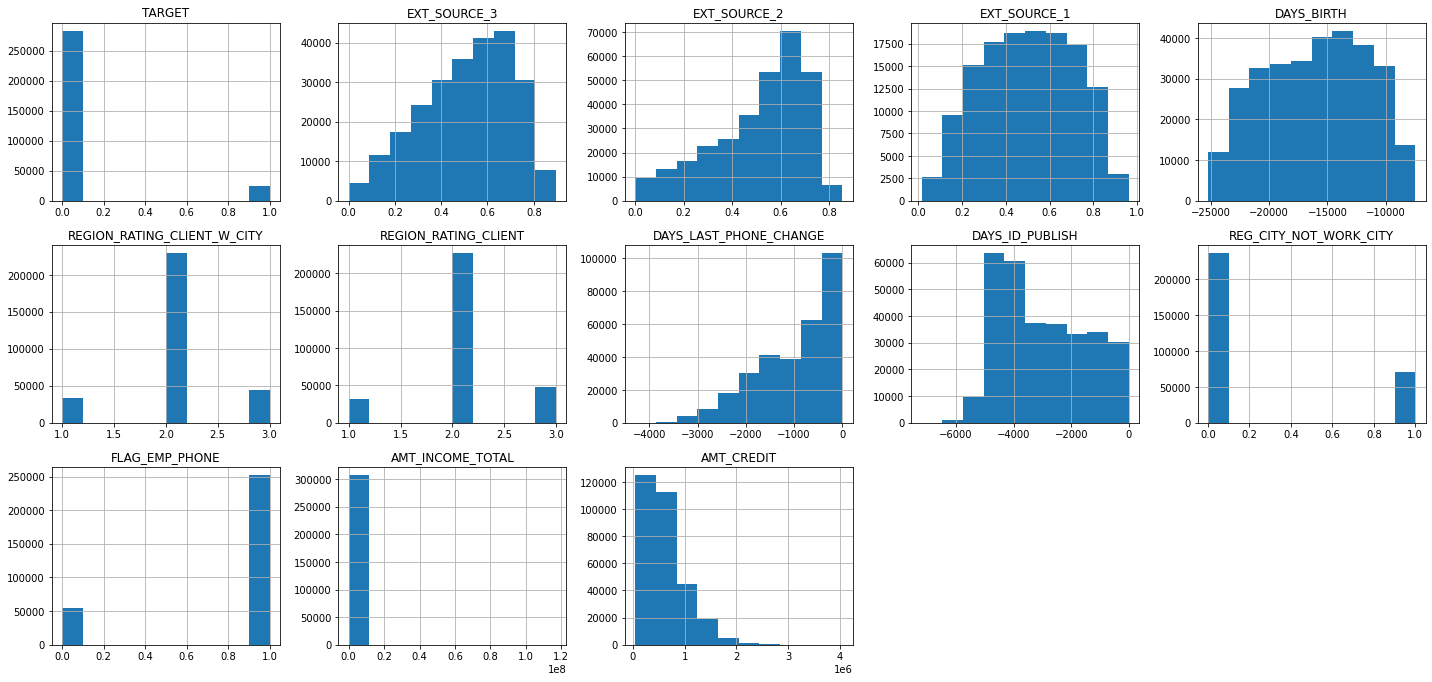

In [15]:
#Distribution Plots of highest correlated input variables. 
# selected_num_features.remove('TARGET')

cnt_cols = len(selected_num_features)

plt.figure(figsize = (20,40))
for i, var in enumerate (selected_num_features):
    plt.subplot(cnt_cols,5, i+1)
    datasets["application_train"][var].hist()
    
    plt.title (var)
    plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'Correlation Heatmap of Top Correlated Features to Target in application_train')

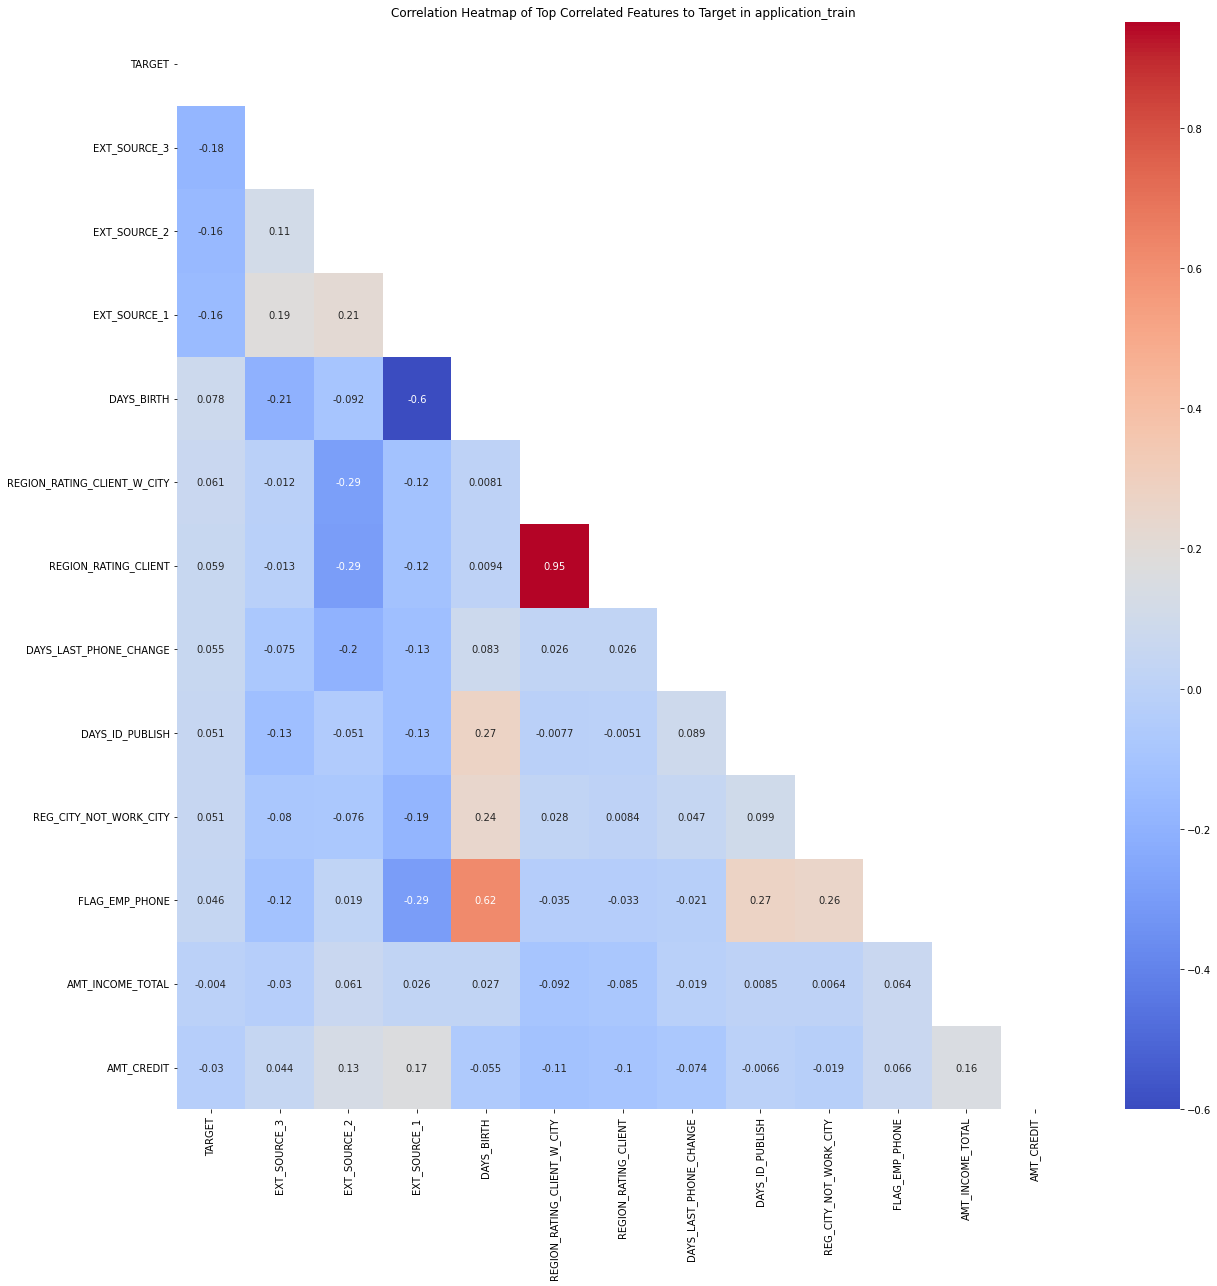

In [16]:
#Correlation Heatmap of top most correlated variables with Target
# selected_num_features.insert(0, 'TARGET')
selected_num_features_df = train[selected_num_features]

#Correlation Matrix
selected_num_features_cm = selected_num_features_df.corr()

#Plot Correlation Matrix as a heatmap
mask = np.triu(selected_num_features_cm)

plt.figure(figsize=(20,20))
sns.heatmap(selected_num_features_cm, cmap=plt.cm.coolwarm, annot=True, mask=mask )
plt.title("Correlation Heatmap of Top Correlated Features to Target in application_train")

In [17]:
# Reference: "https://www.geeksforgeeks.org/sort-correlation-matrix-in-python/".

def get_top_abs_correlations(cm):
    # Retain upper triangular values of correlation matrix and 
    # make Lower triangular values Null
    upper_corr_mat = cm.where(np.triu(np.ones(cm.shape),k=1).astype(np.bool))
    
    # Convert to 1-D series and drop Null values 
    unique_corr_pairs = upper_corr_mat.unstack().dropna() 
    
    # Sort correlation pairs 
    sorted_mat = unique_corr_pairs.abs().sort_values() 
    
    return (sorted_mat[sorted_mat > 0.7])


top_abs_corrs = pd.DataFrame(get_top_abs_correlations(selected_num_features_cm))
print("Absolute Correlations > 0.7 Pearson Coefficent:")
top_abs_corrs.columns = ['Correlation Factor']
print(top_abs_corrs)


Absolute Correlations > 0.7 Pearson Coefficent:
                                                  Correlation Factor
REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY            0.950842


In [18]:
top_abs_corrs ['Feature 1 Correlation with Target']=0
top_abs_corrs ['Feature 2 Correlation with Target']=0
i=0

for feature in top_abs_corrs.index:
    top_abs_corrs ['Feature 1 Correlation with Target'].iloc[i] = selected_num_features_cm['TARGET'].loc[feature[0]]
    top_abs_corrs ['Feature 2 Correlation with Target'].iloc[i] = selected_num_features_cm['TARGET'].loc[feature[1]]
    i+=1


In [19]:
top_abs_corrs

,,Correlation Factor,Feature 1 Correlation with Target,Feature 2 Correlation with Target
REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.950842,0.058899,0.060893


### Correlation Observations: 
In the updated selected numerical columns selected from the Application Training dataset, some of the input features were highly correlated with each other. We considered a 'high correlation' when the Pearson Correlation Factor was greater than 0.7, per industry standard. 

**Feature Selection** 
For these highly correlated input features, we selected one input feature per pair based on the highest correlation factor with the target variable and best judgement if this factor is the same. 

Input Features to drop: 
- 'TARGET' --> Output Feature
- 'FLAG_EMP_PHONE' --> Flag is categorical, Keep Days_employed
- 'FLOORSMAX_MEDI'
- 'FLOORSMAX_MODE'
- 'AMT_CREDIT'
- 'REGION_RATING_CLIENT'
- 'REGION_POPULATION_RELATIVE'
- 'DAYS_EMPLOYED'
- 'REG_CITY_NOT_LIVE_CITY'
- 'FLAG_DOCUMENT_THREE' --> Flag is Categorical

In [20]:
inputs_to_drop = ['TARGET','REGION_RATING_CLIENT','FLAG_EMP_PHONE']

for input_var in inputs_to_drop: 
    selected_num_features.remove(input_var)
    
print("Updated Numerical Features based on Correlation Accounting for Multicollinearity:".upper())    
print("-------------------------------------------------------------------------------------")
for col in selected_num_features:
    print(col)
    
print(f"\n# of Variables Listed Above: {len(selected_num_features)}") 

UPDATED NUMERICAL FEATURES BASED ON CORRELATION ACCOUNTING FOR MULTICOLLINEARITY:
-------------------------------------------------------------------------------------
EXT_SOURCE_3
EXT_SOURCE_2
EXT_SOURCE_1
DAYS_BIRTH
REGION_RATING_CLIENT_W_CITY
DAYS_LAST_PHONE_CHANGE
DAYS_ID_PUBLISH
REG_CITY_NOT_WORK_CITY
AMT_INCOME_TOTAL
AMT_CREDIT

# of Variables Listed Above: 10


### Categorical Features

In [21]:
selected_cat_features = []
for col in train: 
    if train[col].dtype == 'object':
        selected_cat_features.append(col)

#Print Categorical Features
print("Categorical Features:")
print("---------------------")
for col in selected_cat_features: 
    print(col)
    
selected_cat_features_len = len(selected_cat_features)
print(f"\n# of Categorical Features: {selected_cat_features_len}\n")

Categorical Features:
---------------------
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE
FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE

# of Categorical Features: 16



<Figure size 720x864 with 0 Axes>

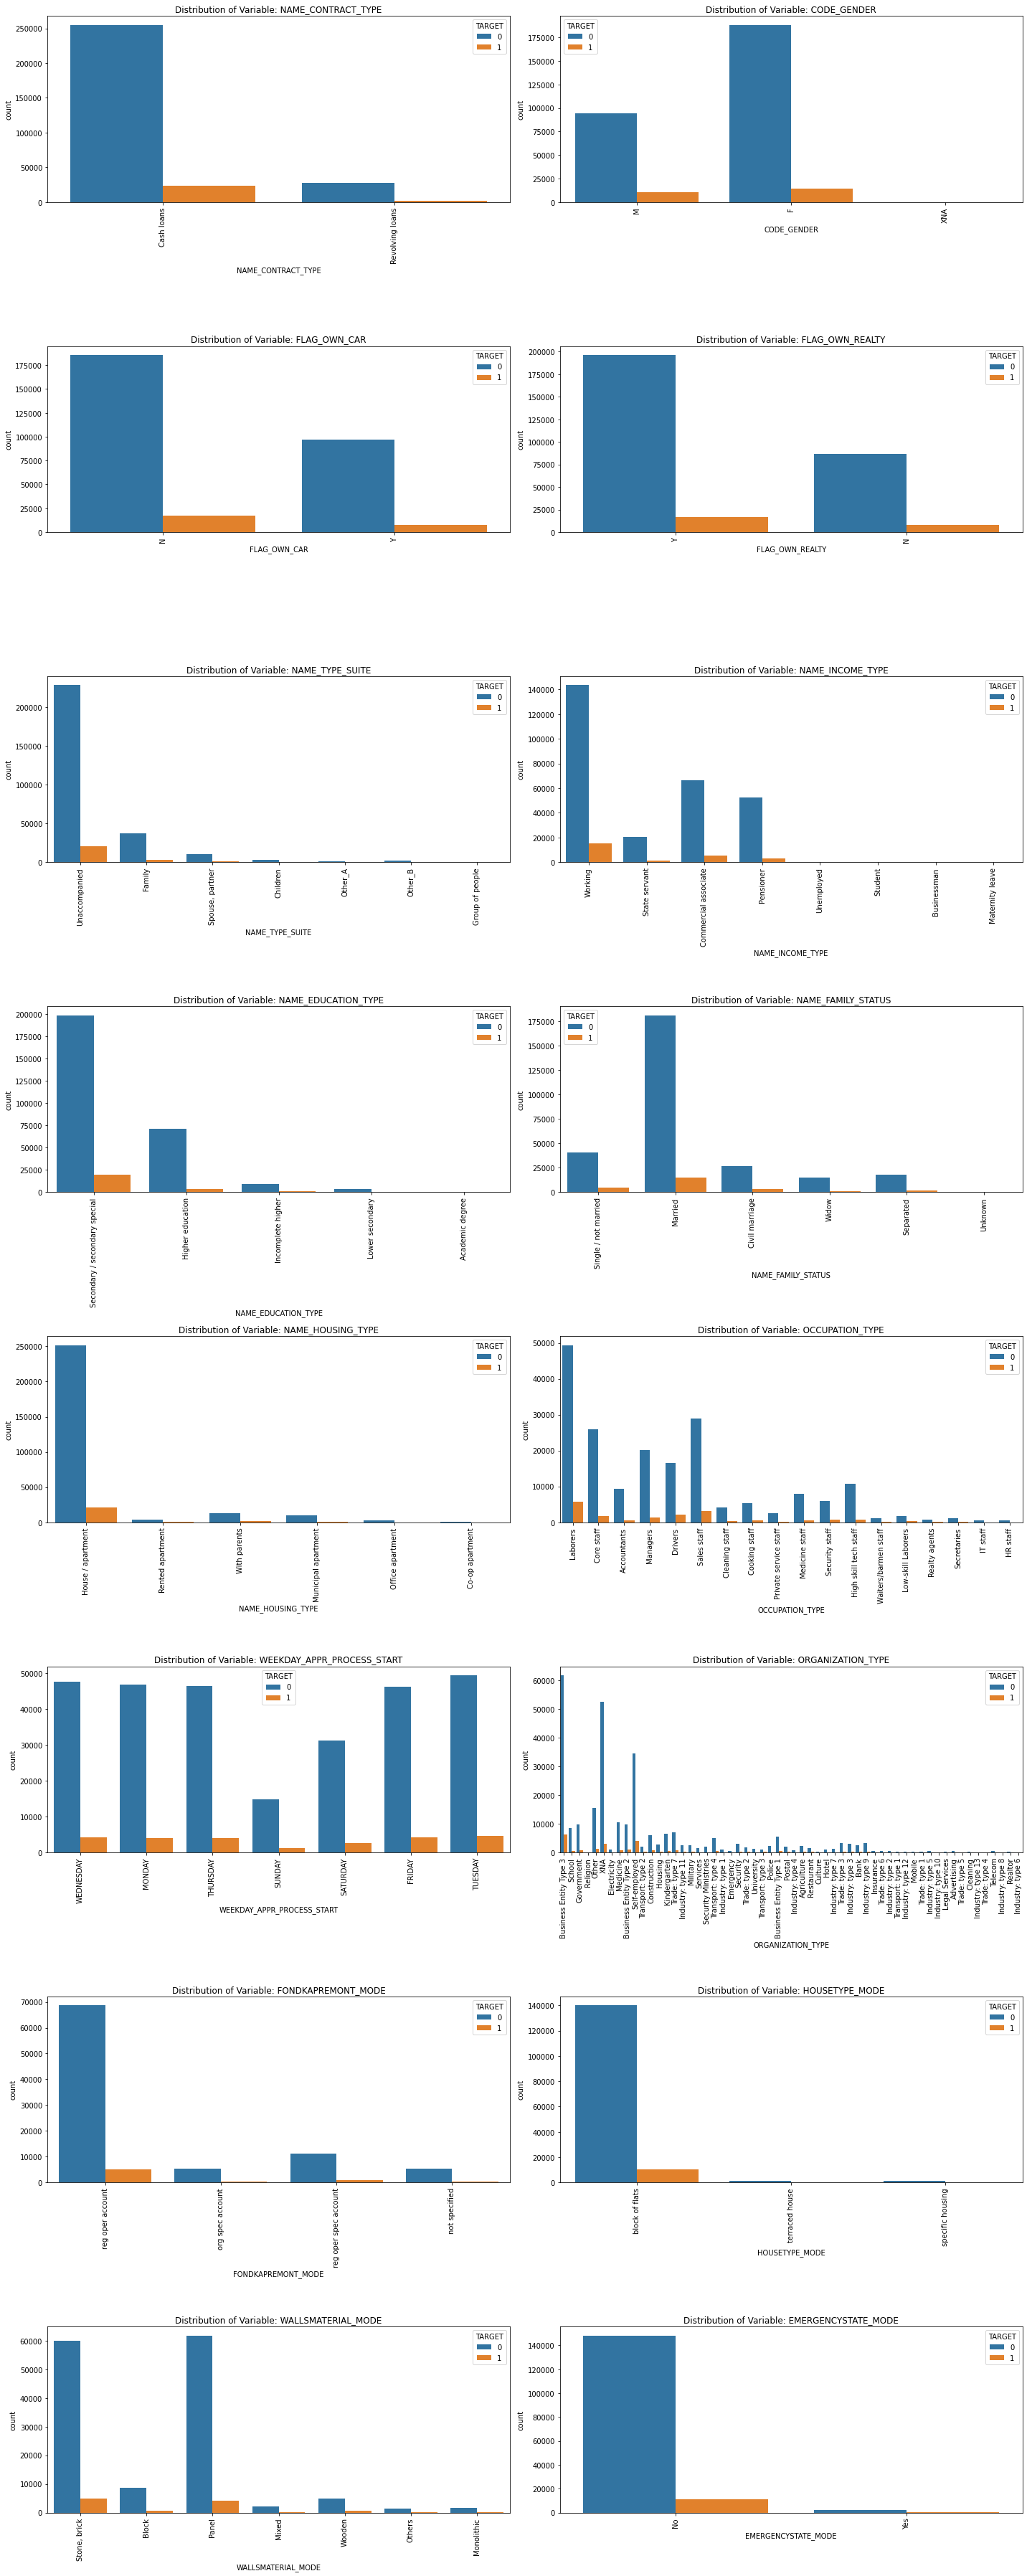

In [22]:
import math
plt.figure(figsize=(10,12)),

fig_rows = math.ceil(selected_cat_features_len/2)
fig, ax = plt.subplots(fig_rows, 2, figsize = (20,50))
col_index = 0
    
for idx, cat in enumerate(selected_cat_features):
    plt.subplot(fig_rows, 2, idx+1)
    sns.countplot(train[cat], hue=train['TARGET'])
    plt.title(f"Distribution of Variable: {cat}")
    plt.xticks(rotation=90)
    plt.tight_layout()

Based on the the above histograms, the following categorical variables will be dropped: 
- 'NAME_TYPE_SUITE' - Who accompanied client when applying for the previous application doesn't really affect ability to pay
- 'NAME_HOUSING_TYPE' - Majority of people live in either house or apartment
- 'WEEKDAY_APPR_PROCESS_START'- Which day of the week a client applied for the loan doesn't really affect ability to pay
- 'FONDKAPREMONT' - Distribution appears similar across all segments
- 'HOUSETYPE_MODE' - Almost all applications are from 'block of flats'
- 'WALLSMATERIAL_MODE' - Almost all wall materials are stone,brick or Panel
- 'EMERGENCYSTATE_MODE' - Almost all applications were not emergency state mode
- 'ORGANIZATION_TYPE'- Appears most organization types have relatively balanced proportions of paid and not paid loans. Also, this can be assumed to have a high correlation with occupation type. 
- 'NAME_INCOME_TYPE' - Presumably has high correlation with 'OCCUPATION' and multiple empty categories

In [23]:
inputs_to_drop = ['NAME_TYPE_SUITE', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 
                  'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE','ORGANIZATION_TYPE','NAME_INCOME_TYPE']

for input_var in inputs_to_drop: 
    selected_cat_features.remove(input_var)
    
print("Updated Categorical Columns based on Histograms of Distributions".upper())    
print("-------------------------------------------------------------------------------------")
for col in selected_cat_features:
    print(col)
    
print(f"\n# of Variables Listed Above Minus: {len(selected_cat_features)}") 

UPDATED CATEGORICAL COLUMNS BASED ON HISTOGRAMS OF DISTRIBUTIONS
-------------------------------------------------------------------------------------
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
OCCUPATION_TYPE

# of Variables Listed Above Minus: 7


### Final Selected Numerical and Categorical Features in Application Training Set

In [24]:
print("Final Features Selected from Application Training Set: ")
print()
print('NUMERICAL FEATURES: ')
print('----------------------')
for col in selected_num_features: 
    print(col)
print(f"\n# of Variables Listed Above: {len(selected_num_features)}") 
print()
print()
print('CATEGORICAL FEATURES: ')
print('----------------------')
for col in selected_cat_features: 
    print(col)
print(f"\n# of Variables Listed Above: {len(selected_cat_features)}") 

Final Features Selected from Application Training Set: 

NUMERICAL FEATURES: 
----------------------
EXT_SOURCE_3
EXT_SOURCE_2
EXT_SOURCE_1
DAYS_BIRTH
REGION_RATING_CLIENT_W_CITY
DAYS_LAST_PHONE_CHANGE
DAYS_ID_PUBLISH
REG_CITY_NOT_WORK_CITY
AMT_INCOME_TOTAL
AMT_CREDIT

# of Variables Listed Above: 10


CATEGORICAL FEATURES: 
----------------------
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
OCCUPATION_TYPE

# of Variables Listed Above: 7


# Baseline Experiments

In [25]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from time import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [26]:
#Table to track experimental results
try:
    expLog
except NameError:

    expLog = pd.DataFrame(columns=["Experiment Number",
                                   "Model",
                                   "# Transformed Input Features",
                                   "# Original Numerical Features",
                                   "# Original Categorical Features",
                                   "Train Acc",
                                   "Valid Acc",
                                   "Test Acc",
                                   "Train F1",
                                   "Valid F1",    
                                   "Test F1",
                                   "Train AUROC",
                                   "Valid AUROC",                                   
                                   "Test AUROC",                                 
                                   "Training Time",
                                   "Training Prediction Time",
                                   "Validation Prediction Time",
                                   "Test Prediction Time",
                                   "Hyperparameters",
                                   "Best Parameter",
                                   "Best Hypertuning Score",
                                   "Description"])

display(expLog)


,Experiment Number,Model,# Transformed Input Features,# Original Numerical Features,# Original Categorical Features,Train Acc,Valid Acc,Test Acc,Train F1,Valid F1,...,Valid AUROC,Test AUROC,Training Time,Training Prediction Time,Validation Prediction Time,Test Prediction Time,Hyperparameters,Best Parameter,Best Hypertuning Score,Description


In [27]:
# Function to train models
def train_model(df, exp_name, num_features, cat_features, pipeline):
    
    features = num_features + cat_features

    # Split data into Train, Test, and Validation Sets
    y = train['TARGET']
    X = train[features]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    print(f"X train           shape: {X_train.shape}")
    print(f"X validation      shape: {X_valid.shape}")
    print(f"X test            shape: {X_test.shape}")
    
    
    print("\nPERFORMING TRAINING: {exp_name}")
    print("\tPipeline:",[name for name, _ in pipeline.steps])
    print("\t# Total Features: ", len(features))
    
    print("\nNumerical Features:")
    print(num_features)
    print("\t# Numerical Features: ", len(num_features))

    print("\nCategorical Features:")
    print(cat_features)
    print("\t# Categorical Features: ", len(cat_features))

    print('\ntraining in progress...')

    #Fit the baseline pipeline to Training data
    start=time()
    model = pipeline.fit(X_train, y_train)
    train_time = np.round(time() - start, 4)
    print(f"\nBaseline Experiment with Original {len(features)} Input Variables - Training Time: %0.3fs" % (train_time))
    
    return features, X_train, X_valid, X_test, y_train, y_valid, y_test, model, train_time

In [28]:
from sklearn.metrics import confusion_matrix

#Function to predict and score trained models
def predict_and_score(X, y, model, model_ID):
    start = time()
    y_pred = model.predict(X)
    pred_time = time() - start
    
    print("\tPrediction Time: %0.3fs" % (pred_time))
    
    acc = accuracy_score(y, y_pred)
    print("\tAccuracy Score: ", acc)
    
    f1 = f1_score(y, y_pred)
    print("\tF1 Score: ", f1)
    
    auroc = roc_auc_score(y, model.predict_proba(X)[:, 1])
    print("\tAUROC Score: ", auroc)
    
    print("\tConfusion Matrix:")
    class_labels = ["0: Repaid","1: Not Repaid"]
    cm = confusion_matrix(y,y_pred).astype(np.float32)
    cm /= cm.sum(axis=1)[:, np.newaxis]
    cm_plot = sns.heatmap(cm, vmin=0, vmax=1, annot=True, cmap="Reds")
    plt.xlabel("Predicted", fontsize=13)
    plt.ylabel("True", fontsize=13)
    cm_plot.set(xticklabels=class_labels, yticklabels=class_labels)
    plt.title(model_ID, fontsize=13)
    plt.show()

    return (cm, y_pred, pred_time, acc, f1, auroc)

## Data Preprocessing Pipelines

###  OHE when previously unseen unique values in the test/validation set

Train, validation and Test sets (and the leakage problem we have mentioned previously):

 

Let's look at a small usecase to tell us how to deal with this:

* The OneHotEncoder is fitted to the training set, which means that for each unique value present in the training set, for each feature, a new column is created. Let's say we have 39 columns after the encoding up from 30 (before preprocessing).
* The output is a numpy array (when the option sparse=False is used), which has the disadvantage of losing all the information about the original column names and values.
* When we try to transform the test set, after having fitted the encoder to the training set, we obtain a `ValueError`. This is because the there are new, previously unseen unique values in the test set and the encoder doesn’t know how to handle these values. In order to use both the transformed training and test sets in machine learning algorithms, we need them to have the same number of columns.

This last problem can be solved by using the option handle_unknown='ignore'of the OneHotEncoder, which, as the name suggests, will ignore previously unseen values when transforming the test set.

 

Here is a example that in action:

```python
# Identify the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

```

### Level 3 Pipelines

In [29]:
# Pipeline for the numeric features.
# Use StandardScaler() to standardize the data, Missing values will be imputed using the feature mean.
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler(with_mean=False))
])


# Pipeline for the categorical features.
# Entries with missing values or values that don't exist in the range defined above will be one hot encoded as zeroes.
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value= 'missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


### Level 2 Pipeline

In [30]:
#features_pipeline to combine Numerical and Categorical Pipelines
data_pipeline_17 = ColumnTransformer(
    transformers= [
        ('num', num_pipeline, selected_num_features), 
        ('cat', cat_pipeline, selected_cat_features)],
        remainder='drop',
        n_jobs=-1
    )

# Baseline Experiment
baseline_pipeline_17 = Pipeline([
        ("preparation", data_pipeline_17),
        ("logRegression", LogisticRegression())
    ])

#Name of Experiment
exp_name = "Baseline 1, LogReg with Original 17 Selected Features"

#Description of Experiments
description = 'Baseline 1 LogReg Model with Preselected Num and Cat Features.'

#Start Experiment count for the expLog
exp_count = 1

## Baseline Experiment (Level 1 Pipeline) with 17 Selected Features in application_train

In [31]:
features, X_train, X_valid, X_test, y_train, y_valid, y_test, model, train_time = train_model(train, exp_name, selected_num_features, selected_cat_features, baseline_pipeline_17)

X train           shape: (209107, 17)
X validation      shape: (52277, 17)
X test            shape: (46127, 17)

PERFORMING TRAINING: {exp_name}
	Pipeline: ['preparation', 'logRegression']
	# Total Features:  17

Numerical Features:
['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT']
	# Numerical Features:  10

Categorical Features:
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE']
	# Categorical Features:  7

training in progress...

Baseline Experiment with Original 17 Input Variables - Training Time: 5.727s


### Prediction and Scoring

Baseline Experiment with 49 Variables - Training Set:
	Prediction Time: 0.617s
	Accuracy Score:  0.9198496463533024
	F1 Score:  0.013537374926427311
	AUROC Score:  0.7372700628517899
	Confusion Matrix:


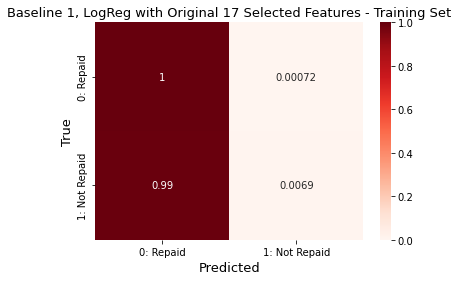

Baseline Experiment with 49 Variables - Validation Set:
	Prediction Time: 0.236s
	Accuracy Score:  0.9164068328327946
	F1 Score:  0.015322217214961693
	AUROC Score:  0.737861430820211
	Confusion Matrix:


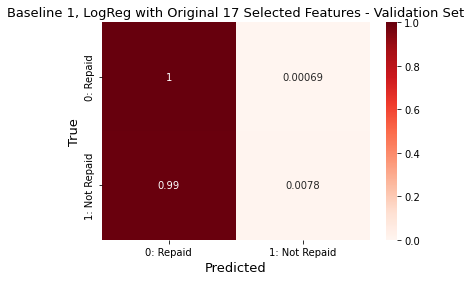

Baseline Experiment with 49 Variables - Test Set:
	Prediction Time: 0.229s
	Accuracy Score:  0.919027901229215
	F1 Score:  0.011119936457505957
	AUROC Score:  0.736770519183925
	Confusion Matrix:


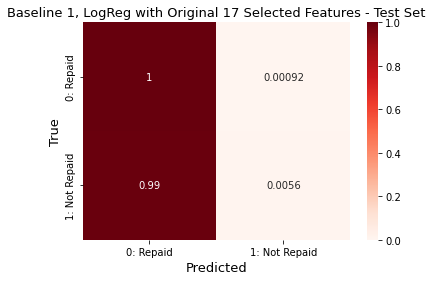

In [32]:
X_train_transformed_17 = data_pipeline_17.fit_transform(X_train)
total_inputs_17 = X_train_transformed_17.shape[1]

# Training Set
print(f"Baseline Experiment with {total_inputs_17} Variables - Training Set:")
cm_train, y_pred_train, pred_time_train, train_acc, train_f1, train_auroc= predict_and_score(X_train, y_train, model, exp_name+' - Training Set')

# Validation Set
print(f"Baseline Experiment with {total_inputs_17} Variables - Validation Set:")
cm_valid, y_pred_valid, pred_time_valid, valid_acc, valid_f1, valid_auroc = predict_and_score(X_valid, y_valid, model, exp_name+' - Validation Set')

# Test Set
print(f"Baseline Experiment with {total_inputs_17} Variables - Test Set:")
cm_test, y_pred_test, pred_time_test, test_acc, test_f1, test_auroc= predict_and_score(X_test, y_test, model, exp_name+' - Test Set')

In [33]:
expLog.loc[len(expLog)] = [exp_count, 
                           exp_name, 
                           total_inputs_17,
                           len(selected_num_features),
                           len(selected_cat_features),
                           round(train_acc, 3), 
                           round(valid_acc, 3),
                           round(test_acc,3),
                           round(train_f1, 3), 
                           round(valid_f1, 3),
                           round(test_f1,3),
                           round(train_auroc, 3), 
                           round(valid_auroc, 3),                                                      
                           round(test_auroc,3),                         
                           train_time, 
                           pred_time_train,
                           pred_time_valid,
                           pred_time_test, 
                           "N/A",
                           "N/A",
                           "N/A",
                           description]


display(expLog)


exp_count += 1

,Experiment Number,Model,# Transformed Input Features,# Original Numerical Features,# Original Categorical Features,Train Acc,Valid Acc,Test Acc,Train F1,Valid F1,...,Valid AUROC,Test AUROC,Training Time,Training Prediction Time,Validation Prediction Time,Test Prediction Time,Hyperparameters,Best Parameter,Best Hypertuning Score,Description
0,1,"Baseline 1, LogReg with Original 17 Selected F...",49,10,7,0.92,0.916,0.919,0.014,0.015,...,0.738,0.737,5.727,0.616539,0.235517,0.228772,N/A,N/A,N/A,Baseline 1 LogReg Model with Preselected Num a...


## Baseline Experiment (Level 1 Pipeline) with all 120 Input Features in application_train

In [34]:
# Input Features excluding SK_ID_CURR and TARGET
all_num_features = train.describe().columns.to_list()
all_cat_features = set(train.columns.to_list()) - set(all_num_features)
all_cat_features = list(all_cat_features)

all_num_features.remove('SK_ID_CURR') #ID has no effect on ability to repay loans
all_num_features.remove('TARGET') 


In [35]:
#features_pipeline to combine Numerical and Categorical Pipelines of all features
data_pipeline_120 = ColumnTransformer(
    transformers= [
        ('num', num_pipeline, all_num_features), 
        ('cat', cat_pipeline, all_cat_features)],
        remainder='drop',
        n_jobs=-1
    )

# Baseline Experiment with 120 Input Vars
baseline_pipeline_120 = Pipeline([
        ("preparation", data_pipeline_120),
        ("logRegression", LogisticRegression())
    ])

#Name of Experiment
exp_name = "Baseline 2, LogReg with original 120 Features"

#Description of Experiments
description = 'Baseline 2 LogReg Model with Num and Cat Features.'

In [36]:
features, X_train, X_valid, X_test, y_train, y_valid, y_test, model, train_time= train_model(train, exp_name, all_num_features, all_cat_features, baseline_pipeline_120)

X train           shape: (209107, 120)
X validation      shape: (52277, 120)
X test            shape: (46127, 120)

PERFORMING TRAINING: {exp_name}
	Pipeline: ['preparation', 'logRegression']
	# Total Features:  120

Numerical Features:
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLO

### Prediction and Scoring

Baseline Experiment Training Set with 250 Input Features:
	Prediction Time: 4.910s
	Accuracy Score:  0.9199261622040391
	F1 Score:  0.018522860492379837
	AUROC Score:  0.7454447754207556
	Confusion Matrix:


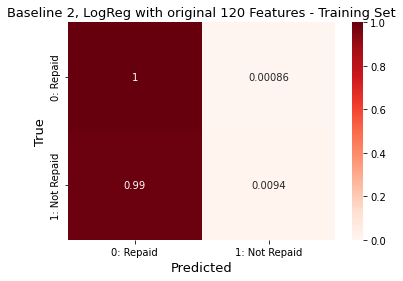

Baseline Experiment Validation Set with 250 Input Features:
	Prediction Time: 0.653s
	Accuracy Score:  0.916311188476768
	F1 Score:  0.017957351290684626
	AUROC Score:  0.7461413104590556
	Confusion Matrix:


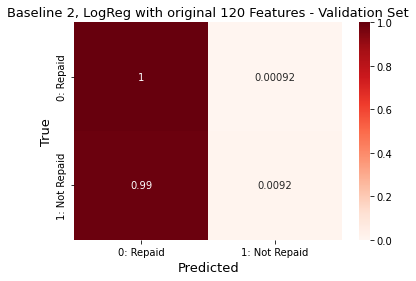

Baseline Experiment Test Set with 250 Input Features:
	Prediction Time: 0.585s
	Accuracy Score:  0.9193097318273462
	F1 Score:  0.021041557075223566
	AUROC Score:  0.7429499060410383
	Confusion Matrix:


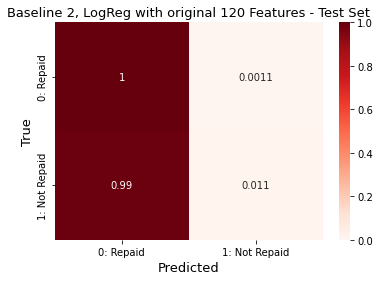

In [37]:
X_train_transformed_120 = data_pipeline_120.fit_transform(X_train)
total_inputs_120 = X_train_transformed_120.shape[1]

# Training Set
print(f"Baseline Experiment Training Set with {total_inputs_120} Input Features:")
cm_train, y_pred_train, pred_time_train, train_acc, train_f1, train_auroc = predict_and_score(X_train, y_train, model, exp_name+' - Training Set')

# Validation Set
print(f"Baseline Experiment Validation Set with {total_inputs_120} Input Features:")
cm_valid, y_pred_valid, pred_time_valid, valid_acc, valid_f1, valid_auroc = predict_and_score(X_valid, y_valid, model, exp_name+' - Validation Set')

# Test Set
print(f"Baseline Experiment Test Set with {total_inputs_120} Input Features:")
cm_test, y_pred_test, pred_time_test, test_acc, test_f1, test_auroc = predict_and_score(X_test, y_test, model, exp_name+' - Test Set')

In [38]:
expLog.loc[len(expLog)] = [exp_count, 
                           exp_name, 
                           total_inputs_120,
                           len(all_num_features),
                           len(all_cat_features),
                           round(train_acc, 3), 
                           round(valid_acc, 3),
                           round(test_acc,3),
                           round(train_f1, 3), 
                           round(valid_f1, 3),
                           round(test_f1,3),
                           round(train_auroc, 3), 
                           round(valid_auroc, 3),                                                      
                           round(test_auroc,3),                         
                           train_time, 
                           pred_time_train,
                           pred_time_valid,
                           pred_time_test, 
                           "N/A",
                           "N/A",
                           "N/A",
                           description]

display(expLog)

exp_count += 1

,Experiment Number,Model,# Transformed Input Features,# Original Numerical Features,# Original Categorical Features,Train Acc,Valid Acc,Test Acc,Train F1,Valid F1,...,Valid AUROC,Test AUROC,Training Time,Training Prediction Time,Validation Prediction Time,Test Prediction Time,Hyperparameters,Best Parameter,Best Hypertuning Score,Description
0,1,"Baseline 1, LogReg with Original 17 Selected F...",49,10,7,0.92,0.916,0.919,0.014,0.015,...,0.738,0.737,5.7270,0.616539,0.235517,0.228772,N/A,N/A,N/A,Baseline 1 LogReg Model with Preselected Num a...
1,2,"Baseline 2, LogReg with original 120 Features",250,104,16,0.92,0.916,0.919,0.019,0.018,...,0.746,0.743,10.8317,4.910362,0.653457,0.585086,N/A,N/A,N/A,Baseline 2 LogReg Model with Num and Cat Featu...


## LogReg Experiment with L1 Penalty with 17 Selected Input Features

In [39]:
# LogReg Experiment with L1 Penalty (L2 is default)
L1_pipeline_17 = Pipeline([
        ("preparation", data_pipeline_17),
        ("lassoRegression", LogisticRegression(penalty='l1', solver = 'saga'))
    ])

#Name of Experiment
exp_name = "LogReg - L1 Penalty with Selected 17 Features"

#Description of Experiments
description = 'LogReg Model-L1 Penalty with Selected 17 Cat + Num Features.'

features, X_train, X_valid, X_test, y_train, y_valid, y_test, model, train_time = train_model(train, exp_name, selected_num_features, selected_cat_features, L1_pipeline_17)

X train           shape: (209107, 17)
X validation      shape: (52277, 17)
X test            shape: (46127, 17)

PERFORMING TRAINING: {exp_name}
	Pipeline: ['preparation', 'lassoRegression']
	# Total Features:  17

Numerical Features:
['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT']
	# Numerical Features:  10

Categorical Features:
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE']
	# Categorical Features:  7

training in progress...

Baseline Experiment with Original 17 Input Variables - Training Time: 21.094s


### Prediction and Scoring

LogReg - L1 Penalty Training Set with 49 Input Features:
	Prediction Time: 0.608s
	Accuracy Score:  0.9198400818719603
	F1 Score:  0.0136518771331058
	AUROC Score:  0.7372155160988161
	Confusion Matrix:


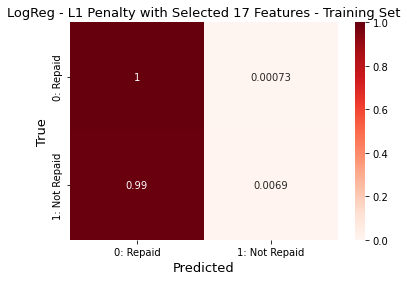

LogReg - L1 Penalty Validation Set with 49 Input Features:
	Prediction Time: 0.234s
	Accuracy Score:  0.9164450905752052
	F1 Score:  0.016216216216216217
	AUROC Score:  0.7379874688442476
	Confusion Matrix:


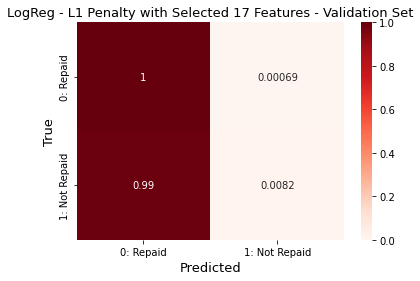

LogReg - L1 Penalty Test Set with 49 Input Features:
	Prediction Time: 0.215s
	Accuracy Score:  0.919027901229215
	F1 Score:  0.011119936457505957
	AUROC Score:  0.7369080241264209
	Confusion Matrix:


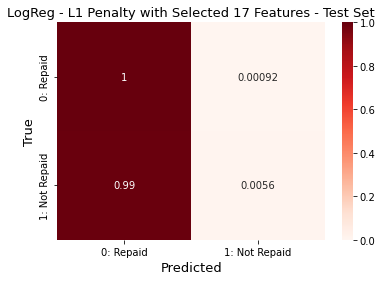

In [40]:
# Training Set
print(f"LogReg - L1 Penalty Training Set with {total_inputs_17} Input Features:")
cm_train, y_pred_train, pred_time_train, train_acc, train_f1, train_auroc = predict_and_score(X_train, y_train, model, exp_name+' - Training Set')

# Validation Set
print(f"LogReg - L1 Penalty Validation Set with {total_inputs_17} Input Features:")
cm_valid, y_pred_valid, pred_time_valid, valid_acc, valid_f1, valid_auroc = predict_and_score(X_valid, y_valid, model, exp_name+' - Validation Set')

# Test Set
print(f"LogReg - L1 Penalty Test Set with {total_inputs_17} Input Features:")
cm_test, y_pred_test, pred_time_test, test_acc, test_f1, test_auroc = predict_and_score(X_test, y_test, model, exp_name+' - Test Set')

In [41]:
expLog.loc[len(expLog)] = [exp_count, 
                           exp_name, 
                           total_inputs_17,
                           len(selected_num_features),
                           len(selected_cat_features),
                           round(train_acc, 3), 
                           round(valid_acc, 3),
                           round(test_acc,3),
                           round(train_f1, 3), 
                           round(valid_f1, 3),
                           round(test_f1,3),
                           round(train_auroc, 3), 
                           round(valid_auroc, 3),                                                      
                           round(test_auroc,3),                         
                           train_time, 
                           pred_time_train,
                           pred_time_valid,
                           pred_time_test, 
                           "N/A",
                           "N/A",
                           "N/A",
                           description]

display(expLog)

exp_count += 1

,Experiment Number,Model,# Transformed Input Features,# Original Numerical Features,# Original Categorical Features,Train Acc,Valid Acc,Test Acc,Train F1,Valid F1,...,Valid AUROC,Test AUROC,Training Time,Training Prediction Time,Validation Prediction Time,Test Prediction Time,Hyperparameters,Best Parameter,Best Hypertuning Score,Description
0,1,"Baseline 1, LogReg with Original 17 Selected F...",49,10,7,0.92,0.916,0.919,0.014,0.015,...,0.738,0.737,5.7270,0.616539,0.235517,0.228772,N/A,N/A,N/A,Baseline 1 LogReg Model with Preselected Num a...
1,2,"Baseline 2, LogReg with original 120 Features",250,104,16,0.92,0.916,0.919,0.019,0.018,...,0.746,0.743,10.8317,4.910362,0.653457,0.585086,N/A,N/A,N/A,Baseline 2 LogReg Model with Num and Cat Featu...
2,3,LogReg - L1 Penalty with Selected 17 Features,49,10,7,0.92,0.916,0.919,0.014,0.016,...,0.738,0.737,21.0944,0.607865,0.234333,0.215436,N/A,N/A,N/A,LogReg Model-L1 Penalty with Selected 17 Cat +...


## LogReg Experiment with L1 Penalty - all 120 Input Features

In [42]:
# LogReg Experiment with L1 Penalty (L2 is default)
L1_pipeline_120 = Pipeline([
        ("preparation", data_pipeline_120),
        ("lassoRegression", LogisticRegression(penalty='l1', solver = 'saga'))
    ])

#Name of Experiment
exp_name = "LogReg - L1 Penalty with 120 Features"

#Description of Experiments
description = 'LogReg Model-L1 Penalty with 104 Num + 16 Cat Features.'

features, X_train, X_valid, X_test, y_train, y_valid, y_test, model, train_time = train_model(train, exp_name, all_num_features, all_cat_features, L1_pipeline_120)


X train           shape: (209107, 120)
X validation      shape: (52277, 120)
X test            shape: (46127, 120)

PERFORMING TRAINING: {exp_name}
	Pipeline: ['preparation', 'lassoRegression']
	# Total Features:  120

Numerical Features:
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'F

### Prediction and Scoring

LogReg - L1 Penalty Training Set with 250 Input Features:
	Prediction Time: 1.839s
	Accuracy Score:  0.9198783397973287
	F1 Score:  0.01701478526167566
	AUROC Score:  0.7440195554569458
	Confusion Matrix:


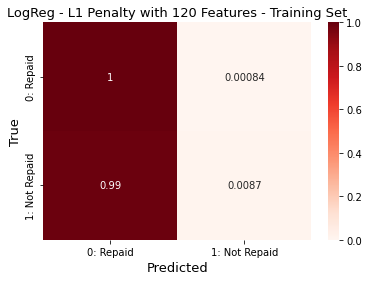

LogReg - L1 Penalty Validation Set with 250 Input Features:
	Prediction Time: 0.540s
	Accuracy Score:  0.916311188476768
	F1 Score:  0.013528748590755355
	AUROC Score:  0.7453250289595666
	Confusion Matrix:


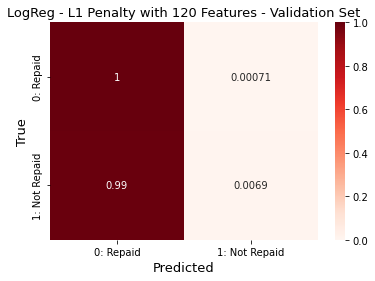

LogReg - L1 Penalty Test Set with 250 Input Features:
	Prediction Time: 0.517s
	Accuracy Score:  0.9192013354434496
	F1 Score:  0.017918313570487485
	AUROC Score:  0.7427365944892591
	Confusion Matrix:


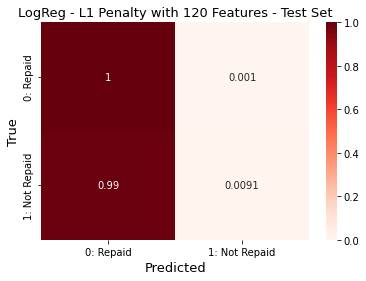

In [43]:
# Training Set
print(f"LogReg - L1 Penalty Training Set with {total_inputs_120} Input Features:")
cm_train, y_pred_train, pred_time_train, train_acc, train_f1, train_auroc = predict_and_score(X_train, y_train, model, exp_name+' - Training Set')

# Validation Set
print(f"LogReg - L1 Penalty Validation Set with {total_inputs_120} Input Features:")
cm_valid, y_pred_valid, pred_time_valid, valid_acc, valid_f1, valid_auroc = predict_and_score(X_valid, y_valid, model, exp_name+' - Validation Set')

# Test Set
print(f"LogReg - L1 Penalty Test Set with {total_inputs_120} Input Features:")
cm_test, y_pred_test, pred_time_test, test_acc, test_f1, test_auroc = predict_and_score(X_test, y_test, model, exp_name+' - Test Set')


In [44]:
expLog.loc[len(expLog)] = [exp_count, 
                           exp_name, 
                           total_inputs_120,
                           len(all_num_features),
                           len(all_cat_features),
                           round(train_acc, 3), 
                           round(valid_acc, 3),
                           round(test_acc,3),
                           round(train_f1, 3), 
                           round(valid_f1, 3),
                           round(test_f1,3),
                           round(train_auroc, 3), 
                           round(valid_auroc, 3),                                                      
                           round(test_auroc,3),                         
                           train_time, 
                           pred_time_train,
                           pred_time_valid,
                           pred_time_test, 
                           "N/A",
                           "N/A",
                           "N/A",
                           description]

display(expLog)

exp_count += 1

,Experiment Number,Model,# Transformed Input Features,# Original Numerical Features,# Original Categorical Features,Train Acc,Valid Acc,Test Acc,Train F1,Valid F1,...,Valid AUROC,Test AUROC,Training Time,Training Prediction Time,Validation Prediction Time,Test Prediction Time,Hyperparameters,Best Parameter,Best Hypertuning Score,Description
0,1,"Baseline 1, LogReg with Original 17 Selected F...",49,10,7,0.92,0.916,0.919,0.014,0.015,...,0.738,0.737,5.7270,0.616539,0.235517,0.228772,N/A,N/A,N/A,Baseline 1 LogReg Model with Preselected Num a...
1,2,"Baseline 2, LogReg with original 120 Features",250,104,16,0.92,0.916,0.919,0.019,0.018,...,0.746,0.743,10.8317,4.910362,0.653457,0.585086,N/A,N/A,N/A,Baseline 2 LogReg Model with Num and Cat Featu...
2,3,LogReg - L1 Penalty with Selected 17 Features,49,10,7,0.92,0.916,0.919,0.014,0.016,...,0.738,0.737,21.0944,0.607865,0.234333,0.215436,N/A,N/A,N/A,LogReg Model-L1 Penalty with Selected 17 Cat +...
3,4,LogReg - L1 Penalty with 120 Features,250,104,16,0.92,0.916,0.919,0.017,0.014,...,0.745,0.743,82.6300,1.839408,0.539958,0.517283,N/A,N/A,N/A,LogReg Model-L1 Penalty with 104 Num + 16 Cat ...


## Log Reg with all 120 Inputs + New Debt_to_Income_Ratio Feature

In [45]:
# All 120 Input Features Plus New Feature Transformation in Pipeline: Debt-to-Income Ratio

from sklearn.base import BaseEstimator, TransformerMixin

class Debt_to_Income_Ratio(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        df = pd.DataFrame(X.copy(), columns=self.features)  # select a subset of columns in X based on self.features 

        feature1 = 'AMT_CREDIT'
        feature2 = 'AMT_INCOME_TOTAL'
        
        #Create new column for debt-to-income ratio
        df['DEBT_TO_INCOME_RATIO'] = df[feature1] / df[feature2] 
        
        #Drop the features that were initially passed
        df.drop(feature1, axis=1, inplace=True)
        df.drop(feature2, axis=1, inplace=True)
        
        #Return df
        return df
    
    
test_pipeline = make_pipeline(Debt_to_Income_Ratio())
debt_income_ratio = test_pipeline.fit_transform (X_train[['AMT_CREDIT', 'AMT_INCOME_TOTAL']])
display(pd.DataFrame(np.c_[X_train[['AMT_CREDIT', 'AMT_INCOME_TOTAL']],debt_income_ratio], columns=['AMT_CREDIT', 'AMT_INCOME_TOTAL'] + ["DEBT_INCOME_RATIO"]) ) 



,AMT_CREDIT,AMT_INCOME_TOTAL,DEBT_INCOME_RATIO
0,540000.0,144000.0,3.750000
1,1762110.0,225000.0,7.831600
2,161730.0,135000.0,1.198000
3,270000.0,67500.0,4.000000
4,1381113.0,202500.0,6.820311
...,...,...,...
209102,1762110.0,270000.0,6.526333
209103,284400.0,112500.0,2.528000
209104,180000.0,45000.0,4.000000
209105,1736937.0,202500.0,8.577467


In [46]:
data_pipeline_DIR_120 = ColumnTransformer( 
    transformers= [
        # (name, transformer,     columns)
        ('num', num_pipeline, all_num_features),
        ('cat', cat_pipeline, all_cat_features),
        ('DIR', make_pipeline(Debt_to_Income_Ratio(), StandardScaler()), ['AMT_CREDIT', 'AMT_INCOME_TOTAL'])
          
    ],
        remainder='drop',
        n_jobs=-1
    )

X_train_transformed = data_pipeline_DIR_120.fit_transform(X_train)
column_names = all_num_features  + \
               list(data_pipeline_DIR_120.transformers_[1][1].named_steps["onehot"].get_feature_names(all_cat_features)) +\
                ['DEBT_TO_INCOME_RATIO']

display(pd.DataFrame(X_train_transformed,  columns=column_names).head())
number_of_inputs = X_train_transformed.shape[1]

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,DEBT_TO_INCOME_RATIO
0,2.763729,1.355273,1.339199,2.022258,1.459046,1.496970,-2.541537,-0.020777,-1.388585,-1.504414,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.077059
1,1.381865,2.117614,4.370030,3.208587,4.255552,1.778614,-2.978958,-0.021845,-0.473084,-2.666495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.437253
2,0.000000,1.270568,0.401090,0.785916,0.364762,0.733344,-5.520724,2.583799,-3.407287,-2.883019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.023874
3,0.000000,0.635284,0.669600,0.961737,0.729523,2.222725,-4.295578,-0.034366,-2.235083,-1.503752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015694
4,0.000000,1.905853,3.425158,2.630799,3.258537,2.222725,-2.070415,-0.010463,-1.092978,-0.992569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.062055


In [47]:
# Baseline Experiment with 120 Input Vars
baseline_pipeline_DIR_120 = Pipeline([
        ("preparation", data_pipeline_DIR_120),
        ("logRegression", LogisticRegression())
    ])

#Name of Experiment)
exp_name = "LogReg with Num and Cat Features + Debt_Income_Ratio"

#Description of Experiments
description =" Logistic Regression Model with Original 120 Num and Cat Features + Debt-Income-Ratio."


In [48]:

features, X_train, X_valid, X_test, y_train, y_valid, y_test, model, train_time = train_model(train, exp_name, all_num_features, all_cat_features, baseline_pipeline_DIR_120)

X train           shape: (209107, 120)
X validation      shape: (52277, 120)
X test            shape: (46127, 120)

PERFORMING TRAINING: {exp_name}
	Pipeline: ['preparation', 'logRegression']
	# Total Features:  120

Numerical Features:
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLO

### Prediction and Scoring

Training Set with all 120 input features + Added Debt-Income-Ratio Feature:
	Prediction Time: 2.619s
	Accuracy Score:  0.9198400818719603
	F1 Score:  0.020682402430474412
	AUROC Score:  0.7453827149165408
	Confusion Matrix:


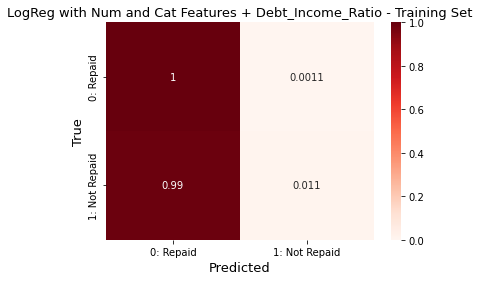

Validation Set with all 120 input features + Added Debt-Income-Ratio Feature:
	Prediction Time: 0.641s
	Accuracy Score:  0.9161198997647149
	F1 Score:  0.01791713325867861
	AUROC Score:  0.7456902440962825
	Confusion Matrix:


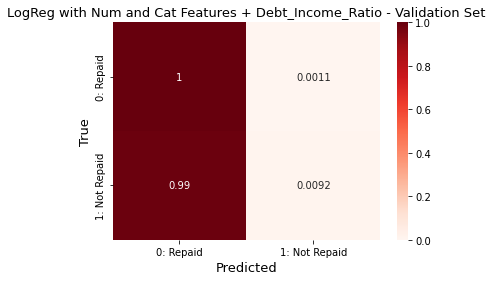

Test Set with all 120 input features + Added Debt-Income-Ratio Feature:
	Prediction Time: 0.518s
	Accuracy Score:  0.9192013354434496
	F1 Score:  0.02255441909257802
	AUROC Score:  0.7430461518884061
	Confusion Matrix:


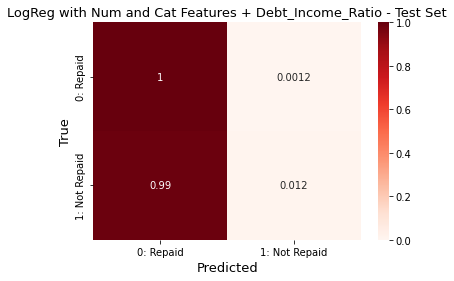

In [49]:
total_inputs = X_train_transformed.shape[1]

# Training Set
print(f"Training Set with all 120 input features + Added Debt-Income-Ratio Feature:")
cm_train, y_pred_train, pred_time_train, train_acc, train_f1, train_auroc = predict_and_score(X_train, y_train, model, exp_name+' - Training Set')

# Validation Set
print(f"Validation Set with all 120 input features + Added Debt-Income-Ratio Feature:")
cm_valid, y_pred_valid, pred_time_valid, valid_acc, valid_f1, valid_auroc = predict_and_score(X_valid, y_valid, model, exp_name+' - Validation Set')

# Test Set
print(f"Test Set with all 120 input features + Added Debt-Income-Ratio Feature:")
cm_test, y_pred_test, pred_time_test, test_acc, test_f1, test_auroc = predict_and_score(X_test, y_test, model, exp_name+' - Test Set')

In [50]:
expLog.loc[len(expLog)] = [exp_count, 
                           exp_name, 
                           total_inputs,
                           len(all_num_features),
                           len(all_cat_features),
                           round(train_acc, 3), 
                           round(valid_acc, 3),
                           round(test_acc, 3),
                           round(train_f1, 3), 
                           round(valid_f1, 3),
                           round(test_f1, 3),
                           round(train_auroc, 3),                          
                           round(valid_auroc, 3),                                                     
                           round(test_auroc,3),                           
                           train_time, 
                           pred_time_train,
                           pred_time_valid,
                           pred_time_test, 
                           "N/A",
                           "N/A",
                           "N/A",
                           description]

display(expLog)

exp_count += 1

,Experiment Number,Model,# Transformed Input Features,# Original Numerical Features,# Original Categorical Features,Train Acc,Valid Acc,Test Acc,Train F1,Valid F1,...,Valid AUROC,Test AUROC,Training Time,Training Prediction Time,Validation Prediction Time,Test Prediction Time,Hyperparameters,Best Parameter,Best Hypertuning Score,Description
0,1,"Baseline 1, LogReg with Original 17 Selected F...",49,10,7,0.92,0.916,0.919,0.014,0.015,...,0.738,0.737,5.7270,0.616539,0.235517,0.228772,N/A,N/A,N/A,Baseline 1 LogReg Model with Preselected Num a...
1,2,"Baseline 2, LogReg with original 120 Features",250,104,16,0.92,0.916,0.919,0.019,0.018,...,0.746,0.743,10.8317,4.910362,0.653457,0.585086,N/A,N/A,N/A,Baseline 2 LogReg Model with Num and Cat Featu...
2,3,LogReg - L1 Penalty with Selected 17 Features,49,10,7,0.92,0.916,0.919,0.014,0.016,...,0.738,0.737,21.0944,0.607865,0.234333,0.215436,N/A,N/A,N/A,LogReg Model-L1 Penalty with Selected 17 Cat +...
3,4,LogReg - L1 Penalty with 120 Features,250,104,16,0.92,0.916,0.919,0.017,0.014,...,0.745,0.743,82.6300,1.839408,0.539958,0.517283,N/A,N/A,N/A,LogReg Model-L1 Penalty with 104 Num + 16 Cat ...
4,5,LogReg with Num and Cat Features + Debt_Income...,251,104,16,0.92,0.916,0.919,0.021,0.018,...,0.746,0.743,10.3708,2.619332,0.641288,0.518304,N/A,N/A,N/A,Logistic Regression Model with Original 120 N...


## Log Reg with Selected 17 Inputs + New Debt_to_Income_Ratio Feature

In [51]:
data_pipeline_DIR_17 = ColumnTransformer( 
    transformers= [
        # (name, transformer,     columns)
        ('num', num_pipeline, selected_num_features),
        ('cat', cat_pipeline, selected_cat_features),
        ('DIR', make_pipeline(Debt_to_Income_Ratio(), StandardScaler()), ['AMT_CREDIT', 'AMT_INCOME_TOTAL'])
          
    ],
        remainder='drop',
        n_jobs=-1
    )

baseline_pipeline_DIR_17 = Pipeline([
        ("preparation", data_pipeline_DIR_17),
        ("logRegression", LogisticRegression())
    ])


X_train_transformed = data_pipeline_DIR_17.fit_transform(X_train)
total_inputs = X_train_transformed.shape[1]

In [52]:
#Name of Experiment)
exp_name = "LogReg with Num and Cat Features + Debt_Income_Ratio"

#Description of Experiments
description =" Logistic Regression Model with Original 17 Num and Cat Features + Debt-Income-Ratio."

features, X_train, X_valid, X_test, y_train, y_valid, y_test, model, train_time = train_model(train, exp_name, all_num_features, all_cat_features, baseline_pipeline_DIR_17)

X train           shape: (209107, 120)
X validation      shape: (52277, 120)
X test            shape: (46127, 120)

PERFORMING TRAINING: {exp_name}
	Pipeline: ['preparation', 'logRegression']
	# Total Features:  120

Numerical Features:
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLO

### Prediction and Scoring

Training Set with Selected 22 Input Features + Added Debt-Income-Ratio Feature:
	Prediction Time: 0.593s
	Accuracy Score:  0.9198831220379997
	F1 Score:  0.014239482200647248
	AUROC Score:  0.7377920561206652
	Confusion Matrix:


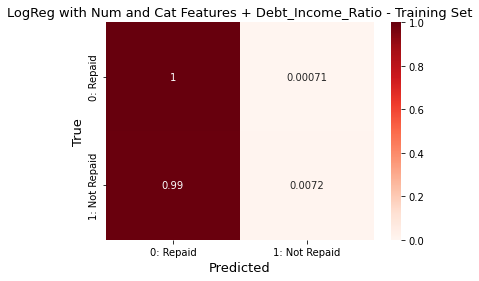

Validation Set with Selected 22 Input Features + Added Debt-Income-Ratio Feature:
	Prediction Time: 0.239s
	Accuracy Score:  0.9164068328327946
	F1 Score:  0.015765765765765764
	AUROC Score:  0.7378848886397801
	Confusion Matrix:


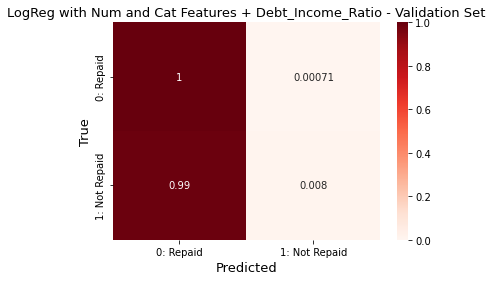

Test Set with Selected 22 Input Features + Added Debt-Income-Ratio Feature:
	Prediction Time: 0.221s
	Accuracy Score:  0.9190712597827736
	F1 Score:  0.011649457241196717
	AUROC Score:  0.737336556668422
	Confusion Matrix:


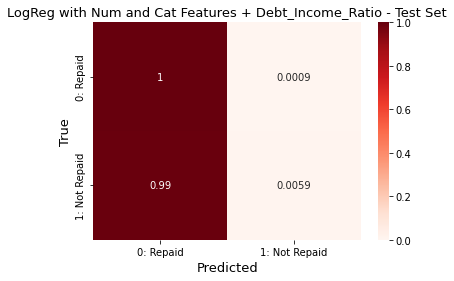

In [53]:
# Training Set
print(f"Training Set with Selected 22 Input Features + Added Debt-Income-Ratio Feature:")
cm_train, y_pred_train, pred_time_train, train_acc, train_f1, train_auroc = predict_and_score(X_train, y_train, model, exp_name+' - Training Set')

# Validation Set
print(f"Validation Set with Selected 22 Input Features + Added Debt-Income-Ratio Feature:")
cm_valid, y_pred_valid, pred_time_valid, valid_acc, valid_f1, valid_auroc = predict_and_score(X_valid, y_valid, model, exp_name+' - Validation Set')

# Test Set
print(f"Test Set with Selected 22 Input Features + Added Debt-Income-Ratio Feature:")
cm_test, y_pred_test, pred_time_test, test_acc, test_f1, test_auroc = predict_and_score(X_test, y_test, model, exp_name+' - Test Set')

In [54]:
expLog.loc[len(expLog)] = [exp_count, 
                           exp_name, 
                           total_inputs,
                           len(all_num_features),
                           len(all_cat_features),
                           round(train_acc, 3), 
                           round(valid_acc, 3),
                           round(test_acc, 3),
                           round(train_f1, 3), 
                           round(valid_f1, 3),
                           round(test_f1, 3),
                           round(train_auroc, 3),                          
                           round(valid_auroc, 3),                                                     
                           round(test_auroc,3),                           
                           train_time, 
                           pred_time_train,
                           pred_time_valid,
                           pred_time_test, 
                           "N/A",
                           "N/A",
                           "N/A",
                           description]

display(expLog)

exp_count += 1

,Experiment Number,Model,# Transformed Input Features,# Original Numerical Features,# Original Categorical Features,Train Acc,Valid Acc,Test Acc,Train F1,Valid F1,...,Valid AUROC,Test AUROC,Training Time,Training Prediction Time,Validation Prediction Time,Test Prediction Time,Hyperparameters,Best Parameter,Best Hypertuning Score,Description
0,1,"Baseline 1, LogReg with Original 17 Selected F...",49,10,7,0.92,0.916,0.919,0.014,0.015,...,0.738,0.737,5.7270,0.616539,0.235517,0.228772,N/A,N/A,N/A,Baseline 1 LogReg Model with Preselected Num a...
1,2,"Baseline 2, LogReg with original 120 Features",250,104,16,0.92,0.916,0.919,0.019,0.018,...,0.746,0.743,10.8317,4.910362,0.653457,0.585086,N/A,N/A,N/A,Baseline 2 LogReg Model with Num and Cat Featu...
2,3,LogReg - L1 Penalty with Selected 17 Features,49,10,7,0.92,0.916,0.919,0.014,0.016,...,0.738,0.737,21.0944,0.607865,0.234333,0.215436,N/A,N/A,N/A,LogReg Model-L1 Penalty with Selected 17 Cat +...
3,4,LogReg - L1 Penalty with 120 Features,250,104,16,0.92,0.916,0.919,0.017,0.014,...,0.745,0.743,82.6300,1.839408,0.539958,0.517283,N/A,N/A,N/A,LogReg Model-L1 Penalty with 104 Num + 16 Cat ...
4,5,LogReg with Num and Cat Features + Debt_Income...,251,104,16,0.92,0.916,0.919,0.021,0.018,...,0.746,0.743,10.3708,2.619332,0.641288,0.518304,N/A,N/A,N/A,Logistic Regression Model with Original 120 N...
5,6,LogReg with Num and Cat Features + Debt_Income...,50,104,16,0.92,0.916,0.919,0.014,0.016,...,0.738,0.737,3.9352,0.593195,0.238655,0.220598,N/A,N/A,N/A,Logistic Regression Model with Original 17 Nu...


# Other Experiments Using 17 Selected Input Features: 

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


-----------------------------------------------------
RANDOM FOREST
-----------------------------------------------------
X train           shape: (209107, 17)
X validation      shape: (52277, 17)
X test            shape: (46127, 17)

PERFORMING TRAINING: {exp_name}
	Pipeline: ['preparation', 'clf']
	# Total Features:  17

Numerical Features:
['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT']
	# Numerical Features:  10

Categorical Features:
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE']
	# Categorical Features:  7

training in progress...

Baseline Experiment with Original 17 Input Variables - Training Time: 14.783s
Baseline Experiment with 17 Variables - Training Set:
	Prediction Time: 3.057s
	Accuracy Score:  0.9999234841492632
	F1 Score:  0.9995217

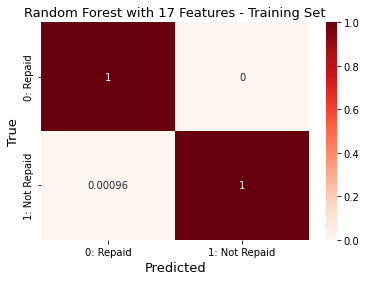

Baseline Experiment with 17 Variables - Validation Set:
	Prediction Time: 0.778s
	Accuracy Score:  0.9164450905752052
	F1 Score:  0.00501138952164009
	AUROC Score:  0.7211054319819079
	Confusion Matrix:


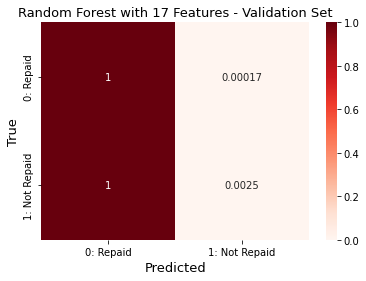

Baseline Experiment with 17 Variables - Test Set:
	Prediction Time: 0.787s
	Accuracy Score:  0.9195698831486981
	F1 Score:  0.007490636704119849
	AUROC Score:  0.7237603224654567
	Confusion Matrix:


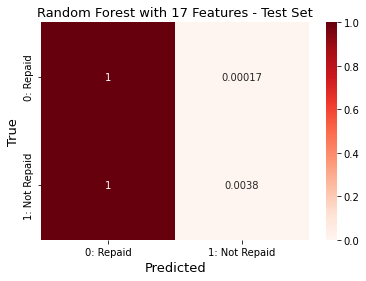

In [56]:
clf_names = ["Random Forest",
#              "SVC"
]

clfs = [RandomForestClassifier(n_jobs=-1, class_weight='balanced'),
#       SVC()
]

for clf_name, clf in zip(clf_names, clfs): 
    
    print("-----------------------------------------------------")
    print(f"{clf_name.upper()}")
    print("-----------------------------------------------------")
    pipe = Pipeline([
        ("preparation", data_pipeline_17),
        ("clf", clf),
    ])
    
    # Name of Experiment
    exp_name = clf_name +" with 17 Features"
    
    # Description of Experiment
    description = f'{clf_name} Model with 10 Num + 7 Cat Features.'
    
    features, X_train, X_valid, X_test, y_train, y_valid, y_test, model, train_time= train_model(train, exp_name, selected_num_features, selected_cat_features, pipe)
    
    
    # Training Set
    print("Baseline Experiment with 17 Variables - Training Set:")
    cm_train, y_pred_train, pred_time_train, train_acc, train_f1, train_auroc = predict_and_score(X_train, y_train, model, exp_name+' - Training Set')

    # Validation Set
    print("Baseline Experiment with 17 Variables - Validation Set:")
    cm_valid, y_pred_valid, pred_time_valid, valid_acc, valid_f1, valid_auroc = predict_and_score(X_valid, y_valid, model, exp_name+' - Validation Set')

    # Test Set
    print("Baseline Experiment with 17 Variables - Test Set:")
    cm_test, y_pred_test, pred_time_test, test_acc, test_f1, test_auroc = predict_and_score(X_test, y_test, model, exp_name+' - Test Set')
    
    expLog.loc[len(expLog)] = [exp_count, 
                           exp_name, 
                           total_inputs_17,
                           len(selected_num_features),
                           len(selected_cat_features),
                           round(train_acc, 3), 
                           round(valid_acc, 3),
                           round(test_acc,3),
                           round(train_f1, 3), 
                           round(valid_f1, 3),
                           round(test_f1,3),
                           round(train_auroc, 3), 
                           round(valid_auroc, 3),                                                      
                           round(test_auroc,3),                               
                           train_time, 
                           pred_time_train,
                           pred_time_valid,
                           pred_time_test, 
                           "N/A",
                           "N/A",
                           "N/A",
                           description]
    exp_count += 1
    


In [57]:
display(expLog)

,Experiment Number,Model,# Transformed Input Features,# Original Numerical Features,# Original Categorical Features,Train Acc,Valid Acc,Test Acc,Train F1,Valid F1,...,Valid AUROC,Test AUROC,Training Time,Training Prediction Time,Validation Prediction Time,Test Prediction Time,Hyperparameters,Best Parameter,Best Hypertuning Score,Description
0,1,"Baseline 1, LogReg with Original 17 Selected F...",49,10,7,0.92,0.916,0.919,0.014,0.015,...,0.738,0.737,5.7270,0.616539,0.235517,0.228772,N/A,N/A,N/A,Baseline 1 LogReg Model with Preselected Num a...
1,2,"Baseline 2, LogReg with original 120 Features",250,104,16,0.92,0.916,0.919,0.019,0.018,...,0.746,0.743,10.8317,4.910362,0.653457,0.585086,N/A,N/A,N/A,Baseline 2 LogReg Model with Num and Cat Featu...
2,3,LogReg - L1 Penalty with Selected 17 Features,49,10,7,0.92,0.916,0.919,0.014,0.016,...,0.738,0.737,21.0944,0.607865,0.234333,0.215436,N/A,N/A,N/A,LogReg Model-L1 Penalty with Selected 17 Cat +...
3,4,LogReg - L1 Penalty with 120 Features,250,104,16,0.92,0.916,0.919,0.017,0.014,...,0.745,0.743,82.6300,1.839408,0.539958,0.517283,N/A,N/A,N/A,LogReg Model-L1 Penalty with 104 Num + 16 Cat ...
4,5,LogReg with Num and Cat Features + Debt_Income...,251,104,16,0.92,0.916,0.919,0.021,0.018,...,0.746,0.743,10.3708,2.619332,0.641288,0.518304,N/A,N/A,N/A,Logistic Regression Model with Original 120 N...
5,6,LogReg with Num and Cat Features + Debt_Income...,50,104,16,0.92,0.916,0.919,0.014,0.016,...,0.738,0.737,3.9352,0.593195,0.238655,0.220598,N/A,N/A,N/A,Logistic Regression Model with Original 17 Nu...
6,7,Random Forest with 17 Features,49,10,7,1.00,0.916,0.920,1.000,0.005,...,0.721,0.724,14.7829,3.057214,0.778230,0.787176,N/A,N/A,N/A,Random Forest Model with 10 Num + 7 Cat Features.


# Gradboost experiment 

In [58]:
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier

In [59]:
from sklearn.base import TransformerMixin
class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None,):
        return X.todense()

-----------------------------------------------------
GRADBOOST
-----------------------------------------------------
X train           shape: (209107, 17)
X validation      shape: (52277, 17)
X test            shape: (46127, 17)

PERFORMING TRAINING: {exp_name}
	Pipeline: ['preparation', 'clf']
	# Total Features:  17

Numerical Features:
['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT']
	# Numerical Features:  10

Categorical Features:
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE']
	# Categorical Features:  7

training in progress...

Baseline Experiment with Original 17 Input Variables - Training Time: 4.066s
Baseline Experiment with 17 Variables - Training Set:
	Prediction Time: 1.023s
	Accuracy Score:  0.920461773159196
	F1 Score:  0.0226818662592

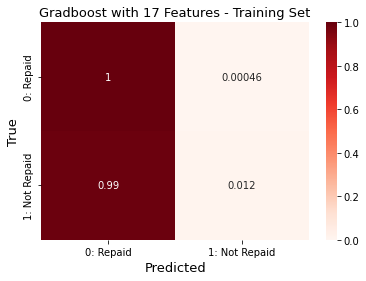

Baseline Experiment with 17 Variables - Validation Set:
	Prediction Time: 0.342s
	Accuracy Score:  0.9163494462191786
	F1 Score:  0.013534852244529664
	AUROC Score:  0.7470006584522082
	Confusion Matrix:


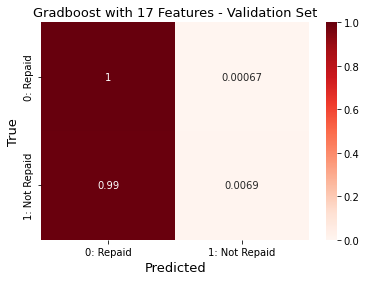

Baseline Experiment with 17 Variables - Test Set:
	Prediction Time: 0.316s
	Accuracy Score:  0.9197866759164914
	F1 Score:  0.02168164992067689
	AUROC Score:  0.7479594859030474
	Confusion Matrix:


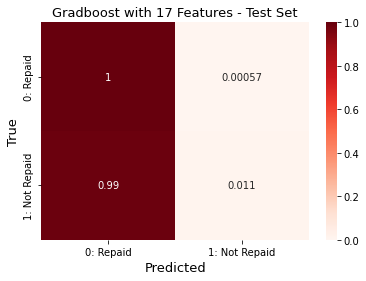

,Experiment Number,Model,# Transformed Input Features,# Original Numerical Features,# Original Categorical Features,Train Acc,Valid Acc,Test Acc,Train F1,Valid F1,...,Valid AUROC,Test AUROC,Training Time,Training Prediction Time,Validation Prediction Time,Test Prediction Time,Hyperparameters,Best Parameter,Best Hypertuning Score,Description
0,1,"Baseline 1, LogReg with Original 17 Selected F...",49,10,7,0.92,0.916,0.919,0.014,0.015,...,0.738,0.737,5.7270,0.616539,0.235517,0.228772,N/A,N/A,N/A,Baseline 1 LogReg Model with Preselected Num a...
1,2,"Baseline 2, LogReg with original 120 Features",250,104,16,0.92,0.916,0.919,0.019,0.018,...,0.746,0.743,10.8317,4.910362,0.653457,0.585086,N/A,N/A,N/A,Baseline 2 LogReg Model with Num and Cat Featu...
2,3,LogReg - L1 Penalty with Selected 17 Features,49,10,7,0.92,0.916,0.919,0.014,0.016,...,0.738,0.737,21.0944,0.607865,0.234333,0.215436,N/A,N/A,N/A,LogReg Model-L1 Penalty with Selected 17 Cat +...
3,4,LogReg - L1 Penalty with 120 Features,250,104,16,0.92,0.916,0.919,0.017,0.014,...,0.745,0.743,82.6300,1.839408,0.539958,0.517283,N/A,N/A,N/A,LogReg Model-L1 Penalty with 104 Num + 16 Cat ...
4,5,LogReg with Num and Cat Features + Debt_Income...,251,104,16,0.92,0.916,0.919,0.021,0.018,...,0.746,0.743,10.3708,2.619332,0.641288,0.518304,N/A,N/A,N/A,Logistic Regression Model with Original 120 N...
5,6,LogReg with Num and Cat Features + Debt_Income...,50,104,16,0.92,0.916,0.919,0.014,0.016,...,0.738,0.737,3.9352,0.593195,0.238655,0.220598,N/A,N/A,N/A,Logistic Regression Model with Original 17 Nu...
6,7,Random Forest with 17 Features,49,10,7,1.00,0.916,0.920,1.000,0.005,...,0.721,0.724,14.7829,3.057214,0.778230,0.787176,N/A,N/A,N/A,Random Forest Model with 10 Num + 7 Cat Features.
7,8,Gradboost with 17 Features,17,10,7,0.92,0.916,0.920,0.023,0.014,...,0.747,0.748,4.0657,1.022855,0.341756,0.315761,N/A,N/A,N/A,Gradboost Model with 10 Num + 7 Cat Features.


In [60]:
clf_names = ["Gradboost",
#              "SVC"
]

clfs = [HistGradientBoostingClassifier()
#       SVC()
]

for clf_name, clf in zip(clf_names, clfs): 
    
    print("-----------------------------------------------------")
    print(f"{clf_name.upper()}")
    print("-----------------------------------------------------")
    pipe = Pipeline([
        ("preparation", data_pipeline_17),
        #("to_dense", DenseTransformer()),
        ("clf", clf)
    ])
    
    # Name of Experiment
    exp_name = clf_name +" with 17 Features"
    
    # Description of Experiment
    description = f'{clf_name} Model with 10 Num + 7 Cat Features.'
    
    features, X_train, X_valid, X_test, y_train, y_valid, y_test, model, train_time = train_model(train, exp_name, selected_num_features, selected_cat_features, pipe)
    
    
    # Training Set
    print("Baseline Experiment with 17 Variables - Training Set:")
    cm_train, y_pred_train, pred_time_train, train_acc, train_f1, train_auroc = predict_and_score(X_train, y_train, model, exp_name+' - Training Set')

    # Validation Set
    print("Baseline Experiment with 17 Variables - Validation Set:")
    cm_valid, y_pred_valid, pred_time_valid, valid_acc, valid_f1, valid_auroc = predict_and_score(X_valid, y_valid, model, exp_name+' - Validation Set')

    # Test Set
    print("Baseline Experiment with 17 Variables - Test Set:")
    cm_test, y_pred_test, pred_time_test, test_acc, test_f1, test_auroc = predict_and_score(X_test, y_test, model, exp_name+' - Test Set')
    
    expLog.loc[len(expLog)] = [exp_count, 
                           exp_name, 
                           len(features),
                           len(selected_num_features),
                           len(selected_cat_features),
                           round(train_acc, 3), 
                           round(valid_acc, 3),
                           round(test_acc,3),
                           round(train_f1, 3), 
                           round(valid_f1, 3),
                           round(test_f1,3),
                           round(train_auroc, 3), 
                           round(valid_auroc, 3),                                                      
                           round(test_auroc,3),                               
                           train_time, 
                           pred_time_train,
                           pred_time_valid,
                           pred_time_test, 
                           "N/A",
                           "N/A",
                           "N/A",
                           description]
    exp_count += 1
    

    
display(expLog)

-----------------------------------------------------
GRADBOOST
-----------------------------------------------------
X train           shape: (209107, 120)
X validation      shape: (52277, 120)
X test            shape: (46127, 120)

PERFORMING TRAINING: {exp_name}
	Pipeline: ['preparation', 'logRegression']
	# Total Features:  120

Numerical Features:
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMEN

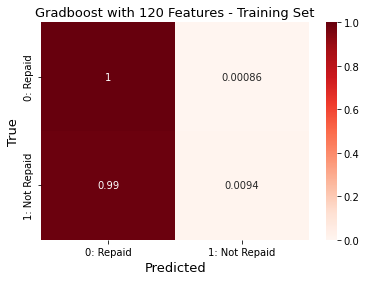

Baseline Experiment with 120 Variables - Validation Set:
	Prediction Time: 0.598s
	Accuracy Score:  0.916311188476768
	F1 Score:  0.017957351290684626
	AUROC Score:  0.7461413104590556
	Confusion Matrix:


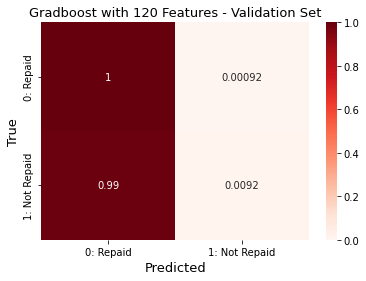

Baseline Experiment with 120 Variables - Test Set:
	Prediction Time: 0.507s
	Accuracy Score:  0.9193097318273462
	F1 Score:  0.021041557075223566
	AUROC Score:  0.7429499060410383
	Confusion Matrix:


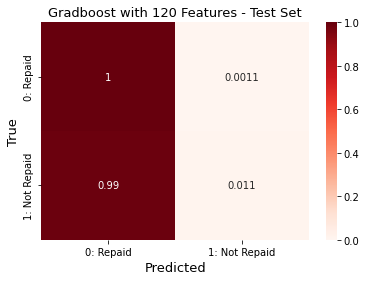

,Experiment Number,Model,# Transformed Input Features,# Original Numerical Features,# Original Categorical Features,Train Acc,Valid Acc,Test Acc,Train F1,Valid F1,...,Valid AUROC,Test AUROC,Training Time,Training Prediction Time,Validation Prediction Time,Test Prediction Time,Hyperparameters,Best Parameter,Best Hypertuning Score,Description
0,1,"Baseline 1, LogReg with Original 17 Selected F...",49,10,7,0.92,0.916,0.919,0.014,0.015,...,0.738,0.737,5.7270,0.616539,0.235517,0.228772,N/A,N/A,N/A,Baseline 1 LogReg Model with Preselected Num a...
1,2,"Baseline 2, LogReg with original 120 Features",250,104,16,0.92,0.916,0.919,0.019,0.018,...,0.746,0.743,10.8317,4.910362,0.653457,0.585086,N/A,N/A,N/A,Baseline 2 LogReg Model with Num and Cat Featu...
2,3,LogReg - L1 Penalty with Selected 17 Features,49,10,7,0.92,0.916,0.919,0.014,0.016,...,0.738,0.737,21.0944,0.607865,0.234333,0.215436,N/A,N/A,N/A,LogReg Model-L1 Penalty with Selected 17 Cat +...
3,4,LogReg - L1 Penalty with 120 Features,250,104,16,0.92,0.916,0.919,0.017,0.014,...,0.745,0.743,82.6300,1.839408,0.539958,0.517283,N/A,N/A,N/A,LogReg Model-L1 Penalty with 104 Num + 16 Cat ...
4,5,LogReg with Num and Cat Features + Debt_Income...,251,104,16,0.92,0.916,0.919,0.021,0.018,...,0.746,0.743,10.3708,2.619332,0.641288,0.518304,N/A,N/A,N/A,Logistic Regression Model with Original 120 N...
5,6,LogReg with Num and Cat Features + Debt_Income...,50,104,16,0.92,0.916,0.919,0.014,0.016,...,0.738,0.737,3.9352,0.593195,0.238655,0.220598,N/A,N/A,N/A,Logistic Regression Model with Original 17 Nu...
6,7,Random Forest with 17 Features,49,10,7,1.00,0.916,0.920,1.000,0.005,...,0.721,0.724,14.7829,3.057214,0.778230,0.787176,N/A,N/A,N/A,Random Forest Model with 10 Num + 7 Cat Features.
7,8,Gradboost with 17 Features,17,10,7,0.92,0.916,0.920,0.023,0.014,...,0.747,0.748,4.0657,1.022855,0.341756,0.315761,N/A,N/A,N/A,Gradboost Model with 10 Num + 7 Cat Features.
8,9,Gradboost with 120 Features,120,10,7,0.92,0.916,0.919,0.019,0.018,...,0.746,0.743,9.2200,2.100374,0.598318,0.507419,N/A,N/A,N/A,Gradboost Model with 104 Num + 16 Cat Features.


In [61]:
clf_names = ["Gradboost",
#              "SVC"
]

clfs = [HistGradientBoostingClassifier()
#       SVC()
]

for clf_name, clf in zip(clf_names, clfs): 
    
    print("-----------------------------------------------------")
    print(f"{clf_name.upper()}")
    print("-----------------------------------------------------")
    pipe = Pipeline([
        ("preparation", data_pipeline_120),
        ("to_dense", DenseTransformer()),
        ("clf", clf)
    ])
    
    # Name of Experiment
    exp_name = clf_name +" with 120 Features"
    
    # Description of Experiment
    description = f'{clf_name} Model with 104 Num + 16 Cat Features.'
    
    features, X_train, X_valid, X_test, y_train, y_valid, y_test, model, train_time = train_model(train, exp_name, all_num_features, all_cat_features, baseline_pipeline_120)
    
    
    
    # Training Set
    print("Baseline Experiment with 120 Variables - Training Set:")
    cm_train, y_pred_train, pred_time_train, train_acc, train_f1, train_auroc = predict_and_score(X_train, y_train, model, exp_name+' - Training Set')

    # Validation Set
    print("Baseline Experiment with 120 Variables - Validation Set:")
    cm_valid, y_pred_valid, pred_time_valid, valid_acc, valid_f1, valid_auroc = predict_and_score(X_valid, y_valid, model, exp_name+' - Validation Set')

    # Test Set
    print("Baseline Experiment with 120 Variables - Test Set:")
    cm_test, y_pred_test, pred_time_test, test_acc, test_f1, test_auroc = predict_and_score(X_test, y_test, model, exp_name+' - Test Set')
    
    expLog.loc[len(expLog)] = [exp_count, 
                           exp_name, 
                           len(features),
                           len(selected_num_features),
                           len(selected_cat_features),
                           round(train_acc, 3), 
                           round(valid_acc, 3),
                           round(test_acc,3),
                           round(train_f1, 3), 
                           round(valid_f1, 3),
                           round(test_f1,3),
                           round(train_auroc, 3), 
                           round(valid_auroc, 3),                                                      
                           round(test_auroc,3),                               
                           train_time, 
                           pred_time_train,
                           pred_time_valid,
                           pred_time_test, 
                           "N/A",
                           "N/A",
                           "N/A",
                           description]
    exp_count += 1
    

    
display(expLog)

# Hyperparameter Tuning 

In [72]:
clf_best_parameters = {}

# Function to run GridSearchCV and log experiments
def gs_classifier(in_features, clf_name, clf, parameters, expCount):
    y = train['TARGET']
    X = train[in_features]
    total_selected_inputs = len(in_features)
    
    numerical_features = X.describe().columns.to_list()
    total_num_inputs = len(numerical_features)
    
    categorical_features = set(X.columns.to_list()) - set(numerical_features)
    categorical_features = list(categorical_features)
    total_cat_inputs = len(categorical_features)
    
       
    description = f'{clf_name} with {total_selected_inputs}'
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    print(f"X train           shape: {X_train.shape}")
    print(f"X validation      shape: {X_valid.shape}")
    print(f"X test            shape: {X_test.shape}")
    
    
    data_pipeline = ColumnTransformer(transformers=[
            ("num_pipeline", num_pipeline, numerical_features),
            ("cat_pipeline", cat_pipeline, categorical_features)],
            remainder='drop',
            n_jobs=-1
        )
    
    clf_pipeline = Pipeline([
            ("preparation", data_pipeline),# combination of numerical, categorical subpipelines
            ("clf", clf)  # classifier estimator you are using
        ])

    gs = GridSearchCV(clf_pipeline,
                      parameters,
                      scoring=['f1','roc_auc'],
                      cv=3,
                      refit='roc_auc',
                      n_jobs=-1,
                      verbose=1)

    print("\nPERFORMING GRID SEARCH FOR {}...".format(clf_name.upper()))
    print("\tpipeline:",[name for name, _ in clf_pipeline.steps])
    print("\tparameters:", parameters)
    print()

    start = time()
    gs.fit(X_train, y_train)

    train_time = time() - start
    print("\tTraining Time: %0.3fs" % (time() - start))
    print()
    
    # Training Set
    print(f"{clf_name} Training Set with {total_selected_inputs} Input Features:")
    cm_train, y_pred_train, pred_time_train, train_acc, train_f1, train_auroc = predict_and_score(X_train, y_train, model, exp_name+' - Training Set')

    # Validation Set
    print(f"{clf_name} Validation Set with {total_selected_inputs} Input Features:")
    cm_valid, y_pred_valid, pred_time_valid, valid_acc, valid_f1, valid_auroc = predict_and_score(X_valid, y_valid, model, exp_name+' - Validation Set')

    # Test Set
    print(f"{clf_name} Experiment Test Set with {total_selected_inputs} Input Features:")
    cm_test, y_pred_test, pred_time_test, test_acc, test_f1, test_auroc = predict_and_score(X_test, y_test, model, exp_name+' - Test Set')


    print("\n\tBest score: %0.3f" % gs.best_score_)
    print("\tBest parameters set:")
    best_parameters = gs.best_estimator_.get_params()

    best_parameters_dict = {}
    for param_name in sorted(parameters.keys()):
        print("\t\t%s: %r" % (param_name, best_parameters[param_name]))
        best_parameters_dict[param_name] = best_parameters[param_name]
        clf_best_parameters[clf_name] = best_parameters_dict    
    print()
    print()

    expLog.loc[len(expLog)] = [exp_count, 
                           clf_name, 
                           total_selected_inputs,
                           total_num_inputs,
                           total_cat_inputs,
                           round(train_acc, 3), 
                           round(valid_acc, 3),
                           round(test_acc, 3),
                           round(train_f1, 3), 
                           round(valid_f1, 3),
                           round(test_f1, 3),
                           round(train_auroc, 3),                          
                           round(valid_auroc, 3),                                                     
                           round(test_auroc,3), 
                           train_time, 
                           pred_time_train,
                           pred_time_valid,
                           pred_time_test, 
                           parameters,
                           best_parameters_dict,
                           round(gs.best_score_,3),
                           description]
    
    exp_count += 1

In [ ]:
# Grid Search over Preparation Pipeline and Classifiers

clf_names = ["Random Forest",
#              "Logistic Regression", 
#              "SVC",
]

estimators = [RandomForestClassifier(),
#               LogisticRegression(solver='saga'),
#              SVC(),
]

param_grids = [{'clf__n_estimators':[300,500],
                'clf__max_features':['sqrt','log2',None],
                },
                       
#                 'clf__C': [1.0, 10.0, 100.0, 1000.0, 10000.0],
#                 'clf__penalty':[None, 'l1','l2']},
#               {'clf__C': [0.001, 0.01, 0.1, 1.], 
#                'clf__kernel': ["linear", "poly", "rbf", "sigmoid"],
#                'clf__gamma':["scale", "auto"]}
]


selected_features = selected_num_features + selected_cat_features
expCount = 1
for clf_name, clf, parameters in zip(clf_names, estimators, param_grids): 
    gs_classifier(selected_features, clf_name, clf, parameters, expCount)
    expCount += 1

X train           shape: (209107, 17)
X validation      shape: (52277, 17)
X test            shape: (46127, 17)

PERFORMING GRID SEARCH FOR RANDOM FOREST...
	pipeline: ['preparation', 'clf']
	parameters: {'clf__n_estimators': [300, 500], 'clf__max_features': ['sqrt', 'log2', None]}

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [ ]:
display(expLog)

In [63]:
# Function Build Barcharts of scores for all models
acc_df = expLog[['Model', 'Train Acc', 'Valid Acc', 'Test Acc']].copy()
F1_df = expLog[['Model','Train F1', 'Valid F1', 'Test F1']].copy()
AUROC_df = expLog[['Model','Train AUROC', 'Valid AUROC', 'Test AUROC']].copy()

def score_barchart(df, title):
    # Plot the bar chart
    df.set_index('Model', inplace=True)
    ax = df.plot(kind='bar', figsize=(10, 6))
    plt.title(f'{title} Score Comparison')
    plt.ylabel(title)
    plt.xticks(rotation=90)
    plt.show()

# Kaggle Submission File Prep

In [68]:
test_class_scores = model.predict_proba(X_kaggle_test)[:, 1]

In [69]:
test_class_scores[0:10]

array([0.06091203, 0.2319424 , 0.03704471, 0.03813419, 0.1346362 ,
       0.03247158, 0.02453353, 0.09834088, 0.01280437, 0.15194608])

In [70]:
# Submission dataframe
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

,SK_ID_CURR,TARGET
0,100001,0.060912
1,100005,0.231942
2,100013,0.037045
3,100028,0.038134
4,100038,0.134636


In [71]:
submit_df.to_csv("submission.csv",index=False)

# Write-up 

## Home Credit Default Risk (HCDR) Project - Phase 2 

**Team:** GroupN_HCDR_1

**Team Members:**
- Leona Naiki Chase
- Nimish Misra
- Jacob Shaw
- Olga Vyrvich

**Phase Leadership Plan**

| Phase | Project Manager |
| :---: | :--- |
| 1 | Jacob |
| 2 | Leona |
| 3 | Olga |
| 4 | Nimish |

**Credit Assignment Plan**

*Overview:* 

| Team and Plan Updates | Presentation Slides | Abstract | Project Desctiption (Data and Tasks)| EDA   | Visual EDA | Modeling Pipelines | Results and Discussion of Results | Conclusion |
| :---                  | :---                | :---     | :---                                | :---  | :---       | :---               | :---                              | :---       |
| Leona                 | Leona               | Leona    | Nimish                              | Jacob | Jacob      | Olga               | Nimish                            | Leona      |

<br><br>
*Tasks:*

| Who  | What | Time |
|:--   | :--  | :--  |
|Leona | Create the phase2 notebook and update the Phase Leader Plan and Credit Assignment Plan | 30 minutes |
|Nimish| Describe the HCDR Dataset, identify the tasks to be tackled, and provide diagams to aid understanding of the workflow | 1 hour |
|Jacob | Run exploratory data analysis, including a data dictionary of the raw features, dataset size, summary statistics, correlation analysis, and other text-based analysis | 1.5 hours |
|Jacob | Run visual exploratory data analysis, including a visualization of each input and taret features, a visualization of the correlation analysis, and pair-wise visualization of the input and output features, a graphic summary of the missing analysis, etc. | 1.5 hours |
|Olga  | Create a visualization of the modeling pipelines/subpipelines and identify familes of input features/count per family, and number of input features.  | 2 hours |
|Olga  | Record an experment log with details including the baseline experiment, families of input features used, Accuracy scores, and AUC/ROC scores. | 1 hour |
|Leona | After all other work is complete, create the abstract and conclusion to summarize at a high level the other work, and what the project will be | 1 hour |
|Leona | Create slides for the group's video presentation based on everyone's collective work | 1 hour |
|Leona | Review all work (including abstract and conclusion) and ensure professional appearance for the entirety of the phase2 notebook | 1 hour |
|All   | Record a 2-minute video presentation about the project and our findings. The video will have a logical and scientific flow to it. | 20 minutes |

## Abstract
In this project, our goal to create  a machine learning (ML) model that can predict the likelihood of a borrower defaulting on their credit using unconventional data sources. The aim  to provide lenders with a model that maximizes profits while minimizing the potential risk.In  phase three of the project, we tackled the problem of predicting credit card default using machine learning techniques and focus on  feature engineering and hyper tuning. Our main goal was to compare different models and identify the best score for this task.We conducted several experiments using different models and feature sets. The baseline experiments involved logistic regression models with 17  selected features  and 120 original input features. These models achieved high accuracy and F1 scores. Next, we explored the use of L1 penalty in logistic regression models with selected features. We observed comparable results to the baseline models, suggesting that the L1 penalty did not  improve performance.We also perfomed with random forest and gradient boosting models using selected features.Our observations suggest that gradient boosting with 17 selected features perfoms better then other models. This model achieved the highest accuracy, F1 score, and (AUROC) on both the validation and test sets.

## ML Pipelines 
The pipelines used in this project were used to increase the efficiency and ease of understanding of our code. Our most basic pipelines (Level 3 Pipelines) were used to prepare our selected input feature data. The numerical features and categorical features were each handled in their own pipelines. Numerical data was standardized while categorical data was one-hot-encoded. In both sets, the pipelines handled imputing missing values. The Level 2 Pipeline, was a column transformer used to streamline the preparation of data before it is applied to our classifier, combining both numerical and categorical pipelines. Lasty, the Level 1 Pipeline was used to combine the Level 2 data preparation pipeline to the classifer model. 

Our baseline pipelines: 
- Logistic Regression model with 17 selected input features from application_train. 
- Logistic Regression model with all 120 input features from application train (does not include SK_ID_CURR). 
- Logistic Regression model with both sets of input features using L1 penalty term. 

We also ran experiments using Logisitic regression  with a newly feature engineered, Debt to Income Ratio, using application_train features: 'AMT_CREDIT' and 'AMT_INCOME TOTAL'. Debt to Income Ratio is a good measure of ability to pay back loans, showing how much of a person's income will go out to pay debt. According to Wells Fargo.com (https://www.wellsfargo.com/goals-credit/smarter-credit/credit-101/debt-to-income-ratio/understanding-dti/#:~:text=35%25%20or%20less%3A%20Looking%20Good,a%20lower%20DTI%20as%20favorable.), A Debt-to-Income Ratio of 35% of less is considered good, 36-49% shows room for improvement, and over 50% show a need to take action.

We also ran different experiments using different algorithms such as a Random Forest model and Gradient Boosting Classifier. 

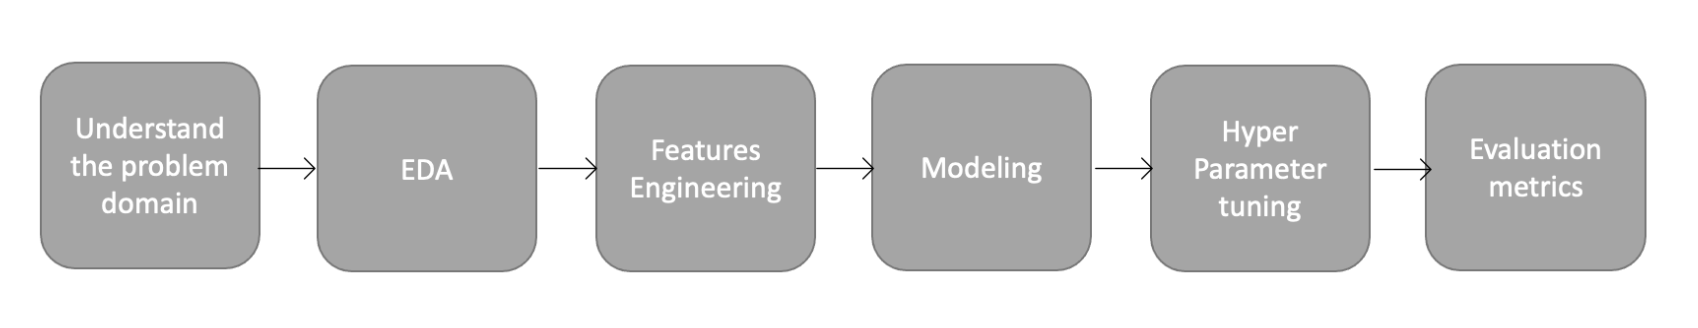

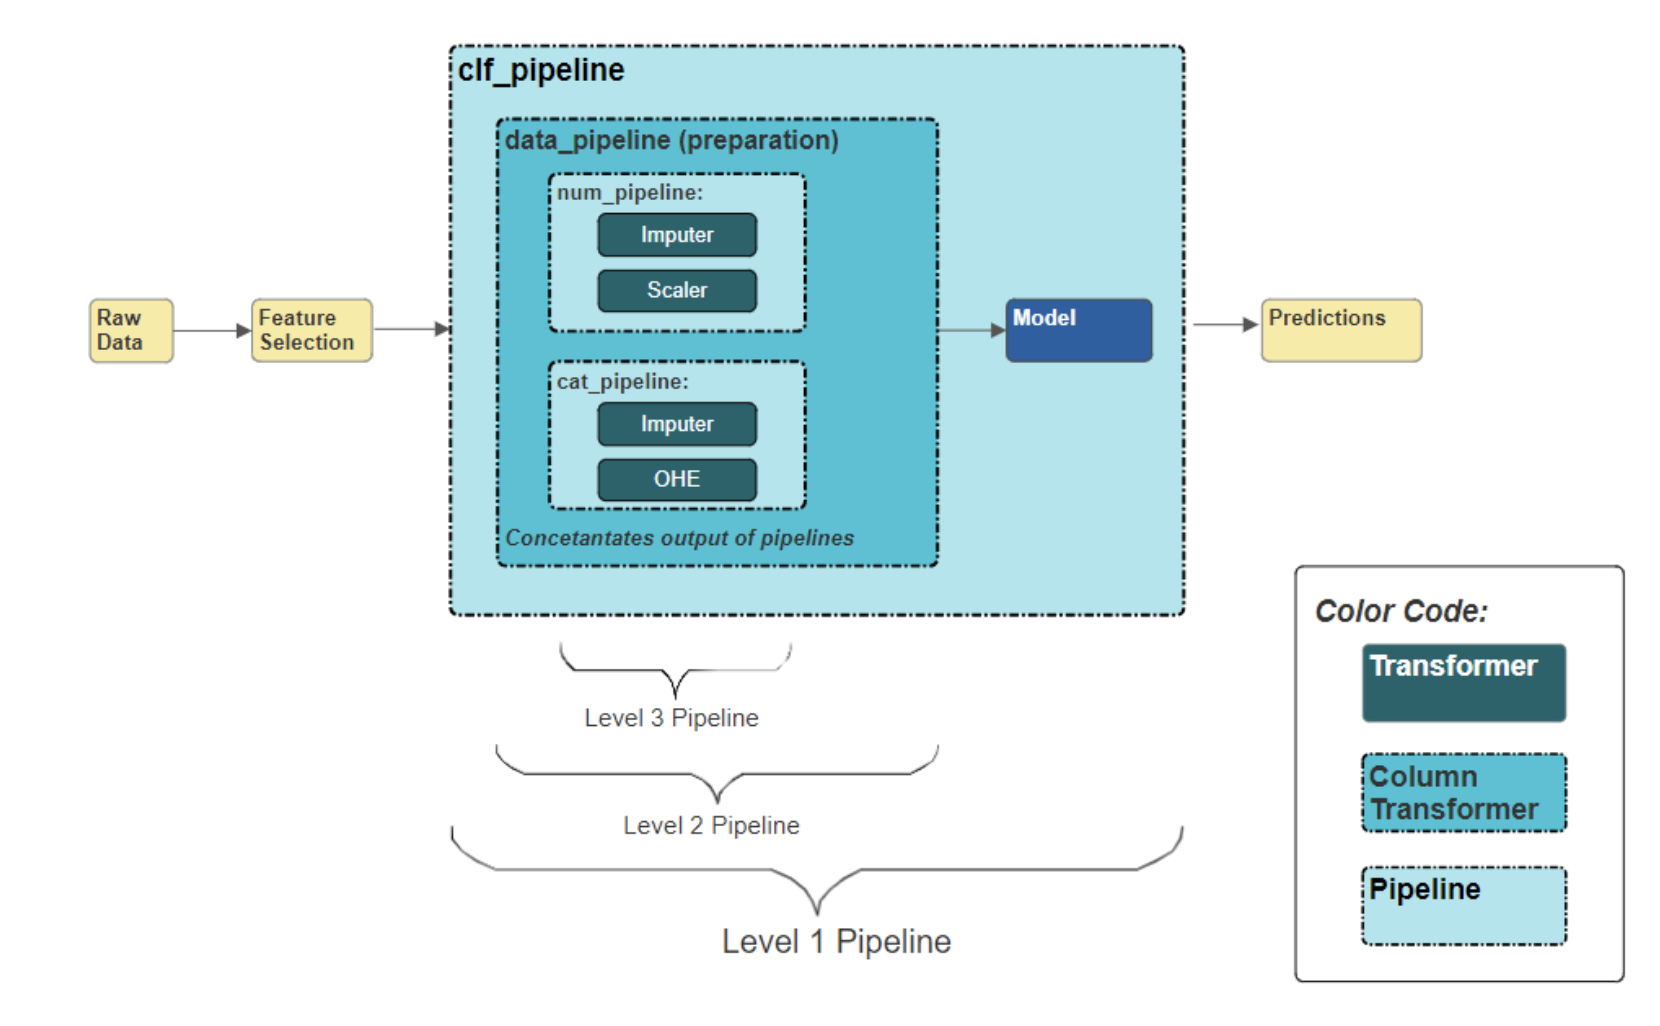

### Experiment Log

In [64]:
expLog.set_index('Experiment Number', inplace=True)
display(expLog)

,Model,# Transformed Input Features,# Original Numerical Features,# Original Categorical Features,Train Acc,Valid Acc,Test Acc,Train F1,Valid F1,Test F1,...,Valid AUROC,Test AUROC,Training Time,Training Prediction Time,Validation Prediction Time,Test Prediction Time,Hyperparameters,Best Parameter,Best Hypertuning Score,Description
Experiment Number,,,,,,,,,,,,,,,,,,,,,
1,"Baseline 1, LogReg with Original 17 Selected F...",49,10,7,0.92,0.916,0.919,0.014,0.015,0.011,...,0.738,0.737,5.7270,0.616539,0.235517,0.228772,N/A,N/A,N/A,Baseline 1 LogReg Model with Preselected Num a...
2,"Baseline 2, LogReg with original 120 Features",250,104,16,0.92,0.916,0.919,0.019,0.018,0.021,...,0.746,0.743,10.8317,4.910362,0.653457,0.585086,N/A,N/A,N/A,Baseline 2 LogReg Model with Num and Cat Featu...
3,LogReg - L1 Penalty with Selected 17 Features,49,10,7,0.92,0.916,0.919,0.014,0.016,0.011,...,0.738,0.737,21.0944,0.607865,0.234333,0.215436,N/A,N/A,N/A,LogReg Model-L1 Penalty with Selected 17 Cat +...
4,LogReg - L1 Penalty with 120 Features,250,104,16,0.92,0.916,0.919,0.017,0.014,0.018,...,0.745,0.743,82.6300,1.839408,0.539958,0.517283,N/A,N/A,N/A,LogReg Model-L1 Penalty with 104 Num + 16 Cat ...
5,LogReg with Num and Cat Features + Debt_Income...,251,104,16,0.92,0.916,0.919,0.021,0.018,0.023,...,0.746,0.743,10.3708,2.619332,0.641288,0.518304,N/A,N/A,N/A,Logistic Regression Model with Original 120 N...
6,LogReg with Num and Cat Features + Debt_Income...,50,104,16,0.92,0.916,0.919,0.014,0.016,0.012,...,0.738,0.737,3.9352,0.593195,0.238655,0.220598,N/A,N/A,N/A,Logistic Regression Model with Original 17 Nu...
7,Random Forest with 17 Features,49,10,7,1.00,0.916,0.920,1.000,0.005,0.007,...,0.721,0.724,14.7829,3.057214,0.778230,0.787176,N/A,N/A,N/A,Random Forest Model with 10 Num + 7 Cat Features.
8,Gradboost with 17 Features,17,10,7,0.92,0.916,0.920,0.023,0.014,0.022,...,0.747,0.748,4.0657,1.022855,0.341756,0.315761,N/A,N/A,N/A,Gradboost Model with 10 Num + 7 Cat Features.
9,Gradboost with 120 Features,120,10,7,0.92,0.916,0.919,0.019,0.018,0.021,...,0.746,0.743,9.2200,2.100374,0.598318,0.507419,N/A,N/A,N/A,Gradboost Model with 104 Num + 16 Cat Features.


## Loss Functions

**Logistic function**

$$ \sigma(t) = \dfrac{1}{1 + \exp(-t)} $$ 


**Logistic Regression model prediction**

$$
\hat{y} =
\begin{cases}
  0 & \text{if } \hat{p} < 0.5, \\
  1 & \text{if } \hat{p} \geq 0.5.
\end{cases}
$$


**Cost function of a single training instanc**

$$
c(\boldsymbol{\theta}) =
\begin{cases}
  -\log(\hat{p}) & \text{if } y = 1, \\
  -\log(1 - \hat{p}) & \text{if } y = 0.
\end{cases}
$$


**Binary Cross-Entropy Loss (CXE)**

Binary Cross Entropy loss, aka log loss, is a special case of negative log likelihood. It measures a classifier's performance, increases as the predicted probability moves farther from the true label. The goal in logistic regression is to minimize the CXE. 
 $$
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}
$$


**LASSO Binary Cross Entropy (LBXE)** 
$$
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}  + \lambda \sum_{j=1}^{n}|w_j|
$$


**Ridge Binary Cross Entropy (RBXE)** 
$$
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]} + \lambda \sum_{j=1}^{n}w_j^2
$$


**Primal Soft Margin SVM Classifier**
$$ {\displaystyle \underset{W,b, \zeta}{\text{argmin }}{\overbrace{\dfrac{1}{2}}^A \underbrace{\mathbf{w}^T \cdot \mathbf{w}}_B \quad + }C\sum _{i=1}^{m}\zeta _{i}} $$

## Evaluation Metrics

###  Accuracy Score 
$$ \text{Accuracy} = \cfrac{TP + TN}{TP + TN + FP + FN} $$

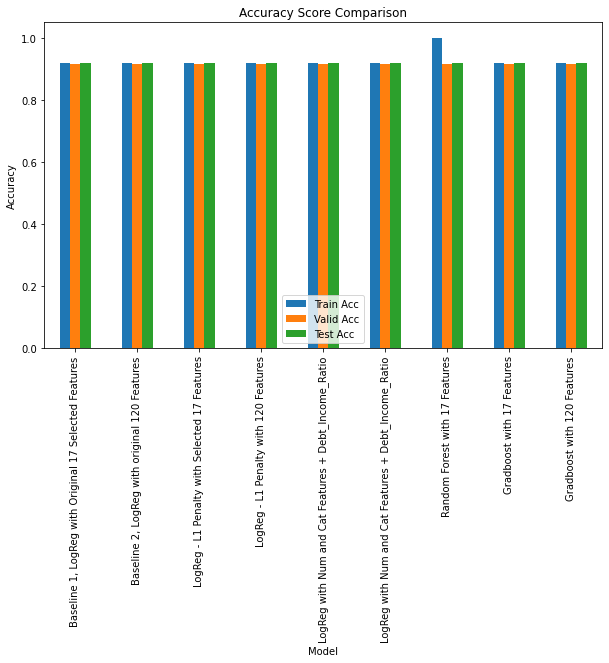

In [65]:
score_barchart(acc_df, "Accuracy")

### F1 Score

$$ \text{precision} = \cfrac{TP}{TP + FP} $$


$$\text{recall} = \cfrac{TP}{TP + FN}$$

<br>
$$
F_1 = \cfrac{2}{\cfrac{1}{\text{precision}} + \cfrac{1}{\text{recall}}} = 2 \times \cfrac{\text{precision}\, \times \, \text{recall}}{\text{precision}\, + \, \text{recall}} = \cfrac{TP}{TP + \cfrac{FN + FP}{2}}
$$

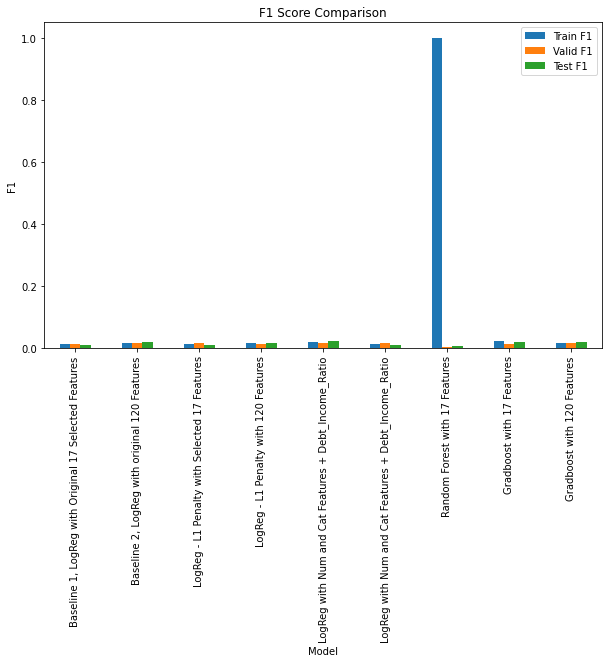

In [66]:
score_barchart(F1_df, "F1")

### Area Under the Receiver Operating Characteristics (AUROC)

$$\text{TPR (aka recall or specificity)} = \cfrac{TP}{TP + FN}$$


<br>
$$ \text{Specificity} = \cfrac{TN}{TN + FP} $$


<br>
$$ \text{FPR = 1 - Specificity}  = \cfrac{FP}{TN + FP} $$

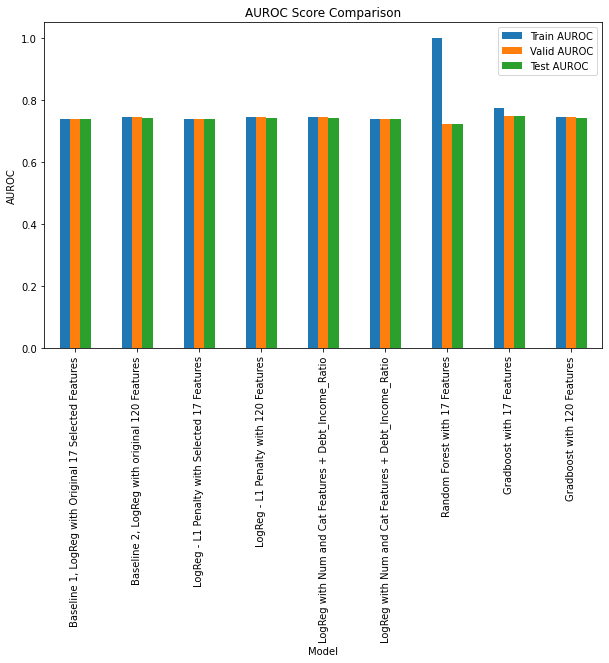

In [67]:
score_barchart(AUROC_df, "AUROC")

 # Conclusion
In Phase 3 of the HCDR Project, we used Home Credit's extensive data set to build baseline models to accurately predict whether a client with minimal credit history would pay back a loan. This real-world problem is highly relevant today in a society of rapidly growing wealth disparities. Using  machine learning pipelines to preprocess and transform input features, we built several  models that were evaluated by the performance metrics: accuracy score, F1 score, and AUROC.

# Kaggle Submission File Prep

**References:** 
- "List Highest Correlation Pairs from a Large Correlation Matrix in Pandas?". Asked July 22, 2013 by Kyle Brandt. 
    Stack Overflow, "https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas".  <br>
    Answered January 3, 2017 by Arun. Licensed under Creative Commons. <br>
    
    
- "Sort Correlation Matrix in Python. Accessed 11/23/23.
    geeksforgeeks.com, ("https://www.geeksforgeeks.org/sort-correlation-matrix-in-python/)<br>
    
    
- " What is a Good Debt-to-Income Ratio?". Accessed 11/20/2023. 
    Wellsfargo.com, (https://www.wellsfargo.com/goals-credit/smarter-credit/credit-101/debt-to-income-ratio/understanding-dti/#:~:text=35%25%20or%20less%3A%20Looking%20Good,a%20lower%20DTI%20as%20favorable.)<br>